In [1]:

# Currents
# Get in, out, and error data, do line losses I guess in terms of power later
# M650 to RG60 (or m650_m630)
# RG60 to m632 (or m630_m632)
# M632 to m633 (or m632_m633)
# M632 to m645 (or m632_m645)
# M632 to m671 (or m632_m671) I guess in our actual xml measurements we try to merge m632_l6321 and l6321_m671
# M633 to XFXFM1 ( m633_m634) ???????? Just count as the line going from m633 to m634
# XFXM1 to 634
# M645 to m646 (or m645_m646)
# M671 to m680 (or m671_m680)
# M671 to m684 (or m671_m684)
# M671 to m692 (or m671_m692)
# M684 to m611 (or m684_m611)
# M684 to m652 (or m682_m652)
# M692 to m675 (or m692_m675)

m_lst = [
'm650_m630',
'm630_m632',
'm632_m633',
'm632_m645',
'm632_m671',
'm633_m634',
'm645_m646',
'm671_m680',
'm671_m684',
'm671_m692',
'm684_m611',
'm684_m652',
'm692_m675'
]

# m_mags_amp_to_A_str = [594.30, 558.40, 81.33, 0.0, 478.29]
# m_angl_deg_to_A_str = [-28.58, -28.58, -37.74, 0.0, -27.03]
# m_mags_amp_to_B_str = [435.61, 414.87, 61.12,143.02,215.12]
# m_angl_deg_to_B_str = [-140.91, -140.91,-150.09,-142.66,-134.66]
# m_mags_amp_to_C_str = [626.92, 586.60,62.70,65.21,475.50]
# m_angl_deg_to_C_str = [93.59, 93.59, 80.48, 57.83, 99.90]

# m_mags_amp_from_A_str = []
# m_angl_deg_from_A_str = []
# m_mags_amp_from_B_str = []
# m_angl_deg_from_B_str = []
# m_mags_amp_from_C_str = []
# m_angl_deg_from_C_str = []


def str_to_dicts(str_lst):
    for s in str_lst:
        s_split = s.split()
        print(s_split)
str_lst = [
    'TO NODE 630  <VRG>..:  593.30  -28.58  435.61 -140.91  626.92   93.59 AMP/DG <',
    'TO NODE 632   .......:  558.40  -28.58  414.87 -140.91  586.60   93.59 AMP/DG <',
    'TO NODE 633   .......:   81.33  -37.74   61.12 -159.09   62.71   80.47 AMP/DG <',
    'TO NODE 645   .......:   0.0     0.0    143.02 -142.66   65.21   57.83 AMP/DG <',
    'TO NODE 671   .......:  478.29  -27.03  215.12 -134.66  475.50   99.90 AMP/DG <',
    'TO NODE 634   .......:   81.33  -37.74   61.12 -159.09   62.70   80.48 AMP/DG <',
    'TO NODE 646   .......:     0.0     0.    65.21 -122.17   65.21   57.83 AMP/DG <',
    'TO NODE 680   .......:     .00     .00     .00     .00     .00     .00 AMP/DG <',
    'TO NODE 684   .......:   63.07  -39.12     0.0     0.0   71.15  121.62 AMP/DG <',
    'TO NODE 692   .......:  229.11  -18.18   69.61  -55.19  178.38  109.39 AMP/DG <',
    'TO NODE 611   .......:    0.0       0.0    0.0    0.0    71.15  121.61 AMP/DG <',
    'TO NODE 652   .......:   63.07  -39.12     0.0    0.0      0.0    0.0  AMP/DG <',
    'TO NODE 675   .......:  205.33   -5.15   69.61  -55.19  124.07  111.79 AMP/DG <'
]

str_lst_2 = [
    'FROM NODE 650   .....:  558.41  -28.58  414.87 -140.91  586.60   93.59 AMP/DG <',
    'FROM NODE 630   .....:  558.41  -28.58  414.87 -140.91  586.60   93.59 AMP/DG <',
    'FROM NODE 632   .....:   81.33  -37.74   61.12 -159.09   62.71   80.47 AMP/DG <',
    'FROM NODE 632   .....:    0.0    0.0    143.02 -142.66   65.21   57.83 AMP/DG <',
    'FROM NODE 632   .....:  470.20  -26.90  186.41 -131.89  420.64  101.66 AMP/DG <',
    'FROM NODE 633   .....:  704.83  -37.74  529.73 -159.09  543.45   80.47 AMP/DG <',
    'FROM NODE 645   .....:    0.0      0.0   65.21 -122.18   65.21   57.82 AMP/DG <',
    'FROM NODE 671   .....:     .00     .00     .00     .00     .00     .00 AMP/DG <',
    'FROM NODE 671   .....:   63.07  -39.12     0.0    0.0    71.15  121.61 AMP/DG <',
    'FROM NODE 671   .....:  229.11  -18.18   69.61  -55.19  178.38  109.39 AMP/DG <',
    'FROM NODE 684   .....:     0.0   0.0      0.0    0.0     71.15  121.61 AMP/DG <',
    'FROM NODE 684   .....:   63.08  -39.15     0.0   0.0      0.0   0.0    AMP/DG <',
    'FROM NODE 692   .....:  205.33   -5.15   69.59  -55.20  124.07  111.78 AMP/DG <'
    
]
def check_match(lst1, lst2, n_lst):
    a_lst = [x.split()[2] for x in lst1]
    b_lst = [y.split()[2] for y in lst2]
    r_lst = ['m' + b + '_' + 'm' + a for a,b in zip(a_lst, b_lst)]
    for r,n in zip(r_lst, n_lst):
        if (r != n):
            print(n + " " + r)
    return r_lst
def merge_data(lst1, lst2, n_lst):
    transformer_ratio = 4160/480
    m_mags_amp_to_A = {k: float(x.split()[4]) for k, x in zip(n_lst, lst1)}
    m_angl_deg_to_A = {k: float(x.split()[5]) for k, x in zip(n_lst, lst1)}
    m_mags_amp_to_B = {k: float(x.split()[6]) for k, x in zip(n_lst, lst1)}
    m_angl_deg_to_B = {k: float(x.split()[7]) for k, x in zip(n_lst, lst1)}
    m_mags_amp_to_C = {k: float(x.split()[8]) for k, x in zip(n_lst, lst1)}
    m_angl_deg_to_C = {k: float(x.split()[9]) for k, x in zip(n_lst, lst1)}
    m_mags_amp_from_A = {k: float(y.split()[4]) for k, y in zip(n_lst, lst2)}
    m_angl_deg_from_A = {k: float(y.split()[5]) for k, y in zip(n_lst, lst2)}
    m_mags_amp_from_B = {k: float(y.split()[6]) for k, y in zip(n_lst, lst2)}
    m_angl_deg_from_B = {k: float(y.split()[7]) for k, y in zip(n_lst, lst2)}
    m_mags_amp_from_C = {k: float(y.split()[8]) for k, y in zip(n_lst, lst2)}
    m_angl_deg_from_C = {k: float(y.split()[9]) for k, y in zip(n_lst, lst2)}
    IEEE13_to_amp_phase = {}
    IEEE13_to_deg_phase = {}
    IEEE13_from_amp_phase = {}
    IEEE13_from_deg_phase = {}
    IEEE13_to_amp_phase['A'] = m_mags_amp_to_A
    IEEE13_to_amp_phase['B'] = m_mags_amp_to_B
    IEEE13_to_amp_phase['C'] = m_mags_amp_to_C
    IEEE13_to_deg_phase['A'] = m_angl_deg_to_A
    IEEE13_to_deg_phase['B'] = m_angl_deg_to_B
    IEEE13_to_deg_phase['C'] = m_angl_deg_to_C
    IEEE13_from_amp_phase['A'] = m_mags_amp_from_A
    IEEE13_from_amp_phase['B'] = m_mags_amp_from_B
    IEEE13_from_amp_phase['C'] = m_mags_amp_from_C
    IEEE13_from_deg_phase['A'] = m_angl_deg_from_A
    IEEE13_from_deg_phase['B'] = m_angl_deg_from_B
    IEEE13_from_deg_phase['C'] = m_angl_deg_from_C
    return IEEE13_to_amp_phase, IEEE13_to_deg_phase, IEEE13_from_amp_phase, IEEE13_from_deg_phase







In [2]:
# # NEWWWWWW FUNCTIONNNNNNNNN
# # let's make a csv reader
# # this is really tough because now we have multiple times:
# # We deal with dictionaries of a single phase in the input to plots so we can just say each csv file deals with one phase. 
# # all we have to do is have a function that takes in a csv and then spits out a dict of dictionaries, each one holding
# # a different timeframe 
# # we have csv reader code somewhere out there. Look into this: 
# # make it as flexible as possible. 
# # but the idea now is to grab data from a folder, assume that the files have the same type of name.

import sys, csv
import numpy as np
import cmath
import os
from os import listdir
from os.path import isfile, join
    
def value_to_complex(val):
    return complex(val[0:-1] + 'j')

# def merge_csv(csv1, csv2, o_csv='output.csv'):
# #     we assume they have the same data columns
#     f1 = open(csv1)
#     f2 = open(csv2)
#     reader1 = csv.reader(f1)
#     reader2 = csv.reader(f2)
#     print('hey')
#     with open(o_csv, 'w') as g:
#         writer = csv.writer(g)
#         print('hi')
#         for row1,row2 in zip(reader1,reader2):
#             new_row = row1 + row2[1:]
#             writer.writerow(new_row)
            

            

# def directory_merge(mypath):
#     onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]    
# #     get these onlyfiles and then do merge_csv and then spit out a csv
#     o_csv = mypath+'/'+ 'output.csv'
#     os.system('cat {0} >> {1}'.format(onlyfiles[0], o_csv))
#     for ofile in onlyfiles[1:]:
#         merge_csv(o_csv, mypath + '/' + ofile, o_csv)
    
            
def parse_csv(my_csv):
#     returns list of dictionaries
    with open(my_csv) as csvfile:
        csv_reader = csv.reader(csvfile)
        fieldnames = []
        main_lst = []
#         so here we get our column names 
        for row in csv_reader:
            if (len(row) > 1 and fieldnames == []):
                fieldnames = row
                break
        csv_dictreader = csv.DictReader(csvfile,fieldnames)
        for row in csv_dictreader:
            new_dict_volt = {}
            new_dict_deg = {}
            for i in range(1,len(row)):
                row_value = cmath.polar(value_to_complex(row[fieldnames[i]]))
                new_dict_volt[fieldnames[i]] = row_value[0]
                new_dict_deg[fieldnames[i]] = row_value[1] * 180 / cmath.pi 
            main_lst.append([new_dict_volt, new_dict_deg])
    return main_lst
            

In [3]:
mname_lst = check_match(str_lst, str_lst_2, m_lst)
IEEE13_to_amp_phase, IEEE13_to_deg_phase, IEEE13_from_amp_phase, IEEE13_from_deg_phase = merge_data(str_lst, str_lst_2, m_lst)

In [4]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import cmath

'''
getting the data from the lines includes two things, we need to get multiple lists
We need:
regulator_list
switch_list
transformer_list
underground_line_list
overhead_line_list

then we need to put into a dictionary of meter lines, doing a sort of from, to sort of thing
then we have to convert everything from complex to mag and angles
then we have to deal with the m632 to l6321 line and the l6321 to m671 line - easy, we jsut add another 'm632 to m671 object
then display in a dictionary as the same format as the IEEE data. 
''' 
def give_complex(my_str):
#     we assume data is from gridlab-d xml
    cut_str = my_str[:-2]
    if cut_str[-1] == 'i':
        cut_str = cut_str[:-1] + 'j'
    return complex(cut_str)

# gives start and stop index of first float in a string
def extract_numbers(mstr):
    a = None
    b = None
    strlst = list(mstr)
    for i in range(0,len(strlst)):
        letter = strlst[i]
        if letter.isdigit and a == None:
            a = i
        elif (letter.isdigit() == False and letter != '.' and a != None):
            b = i
            break
    if a == None or b == None:
        print("no numbers")
    return a,b

# gives you list of first digits in a string and remaining list of what's behind
def give_float_lst(mlst):
    float_lst = []
    leftovers = []
    i = 0
    for x in mlst:
        a,b = extract_numbers(x)
        float_lst.append(float(x[a:b]))
        leftovers.append(x[b:])
    return float_lst, leftovers

def merge_lines(to_amp_phase, to_deg_phase, from_amp_phase, from_deg_phase, mname,m_in, m_out):
    
    to_amp_phase['A'][mname] = to_amp_phase['A'][m_in]
    to_amp_phase['B'][mname] = to_amp_phase['B'][m_in]
    to_amp_phase['C'][mname] = to_amp_phase['C'][m_in]
    to_deg_phase['A'][mname] = to_deg_phase['A'][m_in]
    to_deg_phase['B'][mname] = to_deg_phase['B'][m_in]
    to_deg_phase['C'][mname] = to_deg_phase['C'][m_in]
    from_amp_phase['A'][mname] = from_amp_phase['A'][m_out] 
    from_amp_phase['B'][mname] = from_amp_phase['B'][m_out]
    from_amp_phase['C'][mname] = from_amp_phase['C'][m_out]
    from_deg_phase['A'][mname] = from_deg_phase['A'][m_out]
    from_deg_phase['B'][mname] = from_deg_phase['B'][m_out]
    from_deg_phase['C'][mname] = from_deg_phase['C'][m_out]
    return to_amp_phase, to_deg_phase, from_amp_phase, from_deg_phase

def get_meter_currents(my_xml):
    
#     initiallize dictionary
    input_to_amp_phase = {}
    input_to_deg_phase = {}
    input_from_amp_phase = {}
    input_from_deg_phase = {}
    input_to_amp_phase['A'] = {}
    input_to_amp_phase['B'] = {}
    input_to_amp_phase['C'] = {}
    input_to_deg_phase['A'] = {}
    input_to_deg_phase['B'] = {}
    input_to_deg_phase['C'] = {}
    input_from_amp_phase['A'] = {}
    input_from_amp_phase['B'] = {}
    input_from_amp_phase['C'] = {}
    input_from_deg_phase['A'] = {}
    input_from_deg_phase['B'] = {}
    input_from_deg_phase['C'] = {}
    
# initialize spots for xml parsing
    tree = ET.parse(my_xml)
    root = tree.getroot()
    powerflow = None
    overhead_line_list = None
    underground_line_list = None
    transformer_list = None
    switch_list = None
    regulator_list = None

# find stuff in xml
    for r in root:
    #     print(r.tag)
        if r.tag == "powerflow":
            powerflow = r
    for p in powerflow:
    #     print(p.tag)
        if p.tag == "overhead_line_list":
            overhead_line_list = p
        if p.tag == "underground_line_list":
            underground_line_list = p
        if p.tag == "transformer_list":
            transformer_list = p
        if p.tag == "switch_list":
            switch_list = p
        if p.tag == "regulator_list":
            regulator_list = p
    for my_lst in [overhead_line_list,
                   underground_line_list,
                   transformer_list,
                   switch_list,
                   regulator_list] :    
        for m in my_lst:
            if m.tag == "inherits_from":
                continue
            mname = m.find('from').text + '_' + m.find('to').text
            current_out_A = cmath.polar(give_complex(m.find('current_out_A').text))
            current_out_B = cmath.polar(give_complex(m.find('current_out_B').text))
            current_out_C = cmath.polar(give_complex(m.find('current_out_C').text))
            current_in_A =  cmath.polar(give_complex(m.find('current_in_A').text))
            current_in_B =  cmath.polar(give_complex(m.find('current_in_B').text))
            current_in_C =  cmath.polar(give_complex(m.find('current_in_C').text))
            input_to_amp_phase['A'][mname] = current_in_A[0]
            input_to_amp_phase['B'][mname] = current_in_B[0]
            input_to_amp_phase['C'][mname] = current_in_C[0]
            input_to_deg_phase['A'][mname] = current_in_A[1] * 180 / cmath.pi 
            input_to_deg_phase['B'][mname] = current_in_B[1] * 180 / cmath.pi
            input_to_deg_phase['C'][mname] = current_in_C[1] * 180 / cmath.pi
            input_from_amp_phase['A'][mname] = current_out_A[0]
            input_from_amp_phase['B'][mname] = current_out_B[0]
            input_from_amp_phase['C'][mname] = current_out_C[0]
            input_from_deg_phase['A'][mname] = current_out_A[1] * 180 / cmath.pi 
            input_from_deg_phase['B'][mname] = current_out_B[1] * 180 / cmath.pi
            input_from_deg_phase['C'][mname] = current_out_C[1] * 180 / cmath.pi
#     hack for the special m632_l6321 and l6321_m671 case
    return merge_lines(input_to_amp_phase,
                       input_to_deg_phase,
                       input_from_amp_phase,
                       input_from_deg_phase, 
                       'm632_m671',
                       'm632_l6321',
                       'l6321_m671')
def remove_zeros_from_dict(my_dict):
    cp_dict = my_dict.copy()
    my_keys = my_dict.keys()
    for k in my_keys:
        if cp_dict[k] == 0.0:
            del cp_dict[k]
    return cp_dict
    
# what if we just have a function that takes in two dictionaries, and then we print the errors. 
def two_dict_plt(a_dict, b_dict, phase='A', y_label='Voltage (V)', direction = 'out', mname_lst=None, toggle_error=True):
#     a_clean_dict = remove_zeros_from_dict(a_dict)
    if (mname_lst == None):
        mname_lst = list(a_dict.keys())
    a_lst = [a_dict[i] for i in mname_lst]
    b_lst = [b_dict[i] for i in mname_lst]
    err_lst = [ abs(b-a)/ a * 100 if (a != 0) else 0.0 for a,b in zip(a_lst, b_lst)]
    x = range(1,len(a_lst) + 1)
    plt.figure(1)
    plt.figure(figsize=(8,8))
    plt.xticks(x, mname_lst, rotation=70)
    plt.xlabel('Meters, closest to farthest from {0}'.format(mname_lst[0]))
    plt.ylabel(y_label)
    plt.title('Phase {1} {0} of Line {2} in IEEE 13 node feeder'.format(y_label, phase, direction))
    plt.plot(x, a_lst, 'r')
    plt.plot(x, b_lst, 'b')
    plt.show()
    if (toggle_error):
        plt.figure(2)
        plt.figure(figsize=(8,8))
        plt.xticks(x, mname_lst,rotation=70)
        plt.xlabel('Meters, closest to farthest from m650')
        plt.ylabel('error (%)')
        plt.title('Phase {1} {0} of Meters in IEEE 13 node feeder'.format(y_label, phase))
        plt.plot(x, err_lst)
        plt.show()
    return mname_lst, a_lst, b_lst, err_lst
def exp_volt_dict(my_dict):
    mname_lst = my_dict.keys()
    val_lst = list(my_dict.values())
    mag_lst, leftovers = give_float_lst(val_lst)
    angle_lst, aleftovers = give_float_lst(leftovers)
    mag_dict = {key: val for key,val in zip(mname_lst,mag_lst)}
    angle_dict = {key: val for key,val in zip(mname_lst,angle_lst)}
    return mag_dict, angle_dict





In [5]:
# how do we deal with the transformer without taking it out of relevance? Ask this later to the professor. 
def add_axes_data(ax, y_lines_lst, y_lines_lbls, lbl_lst, y_label, phase):
    if (len(y_lines_lst) < 1 or len(y_lines_lst) != len(y_lines_lbls)):
        return
    a_lst = y_lines_lst[0]
    x = range(1,len(a_lst) + 1)
    ax.xaxis.set_ticks(x)
    ax.set_xticklabels(lbl_lst)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_xlabel('Meters, closest to farthest from {0}'.format(mname_lst[0]))
    ax.set_ylabel(y_label)
    ax.set_title('Phase {1} {0} of Meters in IEEE 13 node feeder'.format(y_label, phase))
    for y,y_lbl in zip( y_lines_lst, y_lines_lbls):
        y_line, = ax.plot(x, y, label=y_lbl)
    ax.legend()

    gridlines = []
    ticklines = []
    ax.grid(True)
    gridlines += ax.get_xgridlines() + ax.get_ygridlines()
    ticklines += ax.get_xticklines() + ax.get_yticklines()
    for line, l2 in zip(gridlines,ticklines):
        line.set_linestyle('-.')
        l2.set_linewidth(3)
        
def give_lsts_and_lbls(dict1, dict2, name_lst, unit_val, min_val=0.0):
    f_lst_p = [(i , dict1[i] / unit_val) for i in name_lst if dict2[i] / unit_val > min_val]
    g_lst_p = [(i , dict2[i] / unit_val) for i in name_lst if dict2[i] / unit_val > min_val]
    lbl_lst = [f[0] for f in f_lst_p]
    f_lst = [f[1] for f in f_lst_p]
    g_lst = [g[1] for g in g_lst_p]
    return f_lst, g_lst, lbl_lst

# what if we just have a function that takes in two dictionaries, and then we print the errors. 
def six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst,
                 mname_lst=None, toggle_error=True, ylabel1='Voltage (V)',
                 ylabel2='Angle', filename='voltage',l1_name='base', l2_name='test'):
#     initialization
    m_fig, ax_lst = plt.subplots(3,3, figsize=(10,10))
    e_fig, e_lst = plt.subplots(2,3, figsize=(10,10))
    m_fig.set_size_inches(20,15)
    e_fig.set_size_inches(20,10)
    plt.figure(figsize=(12,12))

    for a_dict, b_dict, c_dict, d_dict, letter, i in zip(a_dict_lst,b_dict_lst,c_dict_lst, d_dict_lst,
                                                         ('A','B','C'), (int(0),int(1),int(2))):
        if (mname_lst == None):
            mname_lst = list(a_dict.keys())
        phase = letter
        y_label = ylabel1
        a_lst, b_lst, lbl_lst_1 = give_lsts_and_lbls(a_dict, b_dict, mname_lst, 1, 0.05)
        err_lst = [ abs(b-a)/ a * 100 if (a != 0) else 0.0 for a,b in zip(a_lst, b_lst)]
        add_axes_data(ax_lst[0][i], [a_lst, b_lst],[l1_name, l2_name], lbl_lst_1, y_label, phase)
        if (toggle_error):
            add_axes_data(e_lst[0][i], [err_lst],['error'], mname_lst, 'error %', phase) 
        y_label = ylabel2
        c_lst, d_lst, lbl_lst_2 = give_lsts_and_lbls(c_dict, d_dict, lbl_lst_1, 1,-369)
        err_lst = [ b-a for a,b in zip(c_lst, d_lst)]
        add_axes_data(ax_lst[1][i], [c_lst, d_lst],[l1_name, l2_name], lbl_lst_2, y_label, phase)
        if (toggle_error):
            add_axes_data(e_lst[1][i], [err_lst],['error'], mname_lst, 'error deg diff', phase) 
        
            
# now make set of graphs for p.u. 
    pu_volt = 1
    for a_dict, b_dict, letter, i in zip(a_dict_lst,b_dict_lst, ('A','B','C'), (int(0),int(1),int(2))):
        if (mname_lst == None):
            mname_lst = list(a_dict.keys())
        phase = letter
        y_label = 'Voltage (p.u.)'
        f_lst, g_lst, lbl_lst_3 = give_lsts_and_lbls(a_dict, b_dict, mname_lst, pu_volt, -100000)
        add_axes_data(ax_lst[2][i], [f_lst, g_lst],[l1_name, l2_name], lbl_lst_3, y_label, phase)      
            
    m_fig.tight_layout()
    e_fig.tight_layout()   
    m_fig.savefig('cmpIEEE13plts/' + filename)
    e_fig.savefig('cmpIEEE13plts/' + filename + '_error')
    plt.show()
    return None



In [6]:

def compare_gridlab_IEEE(xml_name, lbl='', filename='Current'):
    IEEE13_to_amp_phase, IEEE13_to_deg_phase, IEEE13_from_amp_phase, IEEE13_from_deg_phase = merge_data(str_lst, str_lst_2, m_lst)
    input_to_amp_phase, input_to_deg_phase, input_from_amp_phase, input_from_deg_phase = get_meter_currents(xml_name)
    mname_lst = check_match(str_lst, str_lst_2, m_lst)
    a_dict_lst = [IEEE13_to_amp_phase[phase] for phase in ('A', 'B', 'C')]
    b_dict_lst = [input_to_amp_phase[phase] for phase in ('A', 'B', 'C')]
    c_dict_lst = [IEEE13_to_deg_phase[phase] for phase in ('A', 'B', 'C')]
    d_dict_lst = [input_to_deg_phase[phase] for phase in ('A', 'B', 'C')]
    six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst,
                 mname_lst,ylabel1=lbl+'input Current (A)', ylabel2=lbl+'input Angle (degrees)', filename=filename+'_input')
    
    a_dict_lst = [IEEE13_from_amp_phase[phase] for phase in ('A', 'B', 'C')]
    b_dict_lst = [input_from_amp_phase[phase] for phase in ('A', 'B', 'C')]
    c_dict_lst = [IEEE13_from_deg_phase[phase] for phase in ('A', 'B', 'C')]
    d_dict_lst = [input_from_deg_phase[phase] for phase in ('A', 'B', 'C')]
    six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst,
                 mname_lst,ylabel1=lbl+'output Current (A)', ylabel2=lbl+'output Angle (degrees)',filename=filename+'_output')
    
def compare_gridlab_xmls(xml_name1, xml_name2, ylabel1='Current (A)', ylabel2='Angle', filename='Current'):
    mname_lst = ['m650',
    'm632',
    'm633',
    'm645',
    'm671',
    'm634',
    'm646',
    'm680',
    'm684',
    'm692',
    'm611',
    'm652',
    'm675']
    input_to_amp_phase_1, input_to_deg_phase_1, input_from_amp_phase_1, input_from_deg_phase_1 = get_meter_currents(xml_name1)
    input_to_amp_phase_2, input_to_deg_phase_2, input_from_amp_phase_2, input_from_deg_phase_2 = get_meter_currents(xml_name2)
    a_dict_lst = [input_to_amp_phase_1[phase] for phase in ('A', 'B', 'C')]
    b_dict_lst = [input_to_amp_phase_2[phase] for phase in ('A', 'B', 'C')]
    c_dict_lst = [input_to_deg_phase_1[phase] for phase in ('A', 'B', 'C')]
    d_dict_lst = [input_to_deg_phase_2[phase] for phase in ('A', 'B', 'C')]
    six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst,
                 mname_lst,ylabel1=lbl+'input Current (A)', ylabel2=lbl+'input Angle (degrees)', filename=filename+'_input')
    
    a_dict_lst = [input_from_amp_phase_1[phase] for phase in ('A', 'B', 'C')]
    b_dict_lst = [input_from_amp_phase_2[phase] for phase in ('A', 'B', 'C')]
    c_dict_lst = [input_from_deg_phase_1[phase] for phase in ('A', 'B', 'C')]
    d_dict_lst = [input_from_deg_phase_2[phase] for phase in ('A', 'B', 'C')]
    six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst,
                 mname_lst,
                 ylabel1=lbl+'output Current (A)', ylabel2=lbl+'output Angle (degrees)',filename=filename+'_output')
    
    
    

In [7]:
def compare_gridlab_csv(csv_lst_1, csv_lst_2, ylabel1='Current (A)', ylabel2='Angle', filename='Current', timestep=-1):
    mname_lst = ['m650',
    'm632',
    'm633',
    'm645',
    'm671',
    'm634',
    'm646',
    'm680',
    'm684',
    'm692',
    'm611',
    'm652',
    ]
    dict_A_curr_1, dict_A_ang_1 = parse_csv(csv_lst_1[0])[timestep]
    dict_B_curr_1, dict_B_ang_1 = parse_csv(csv_lst_1[1])[timestep]
    dict_C_curr_1, dict_C_ang_1 = parse_csv(csv_lst_1[2])[timestep]
    dict_A_curr_2, dict_A_ang_2 = parse_csv(csv_lst_2[0])[timestep]
    dict_B_curr_2, dict_B_ang_2 = parse_csv(csv_lst_2[1])[timestep]
    dict_C_curr_2, dict_C_ang_2 = parse_csv(csv_lst_2[2])[timestep]
    a_dict_lst = [dict_A_curr_1, dict_B_curr_1, dict_C_curr_1]
    b_dict_lst = [dict_A_curr_2, dict_B_curr_2, dict_C_curr_2]
    c_dict_lst = [dict_A_ang_1, dict_B_ang_1, dict_C_ang_1]
    d_dict_lst = [dict_A_ang_2, dict_B_ang_2, dict_C_ang_2]
    six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst, mname_lst,
                 ylabel1=ylabel1, ylabel2=ylabel2,filename=filename+'_'+str(timestep))

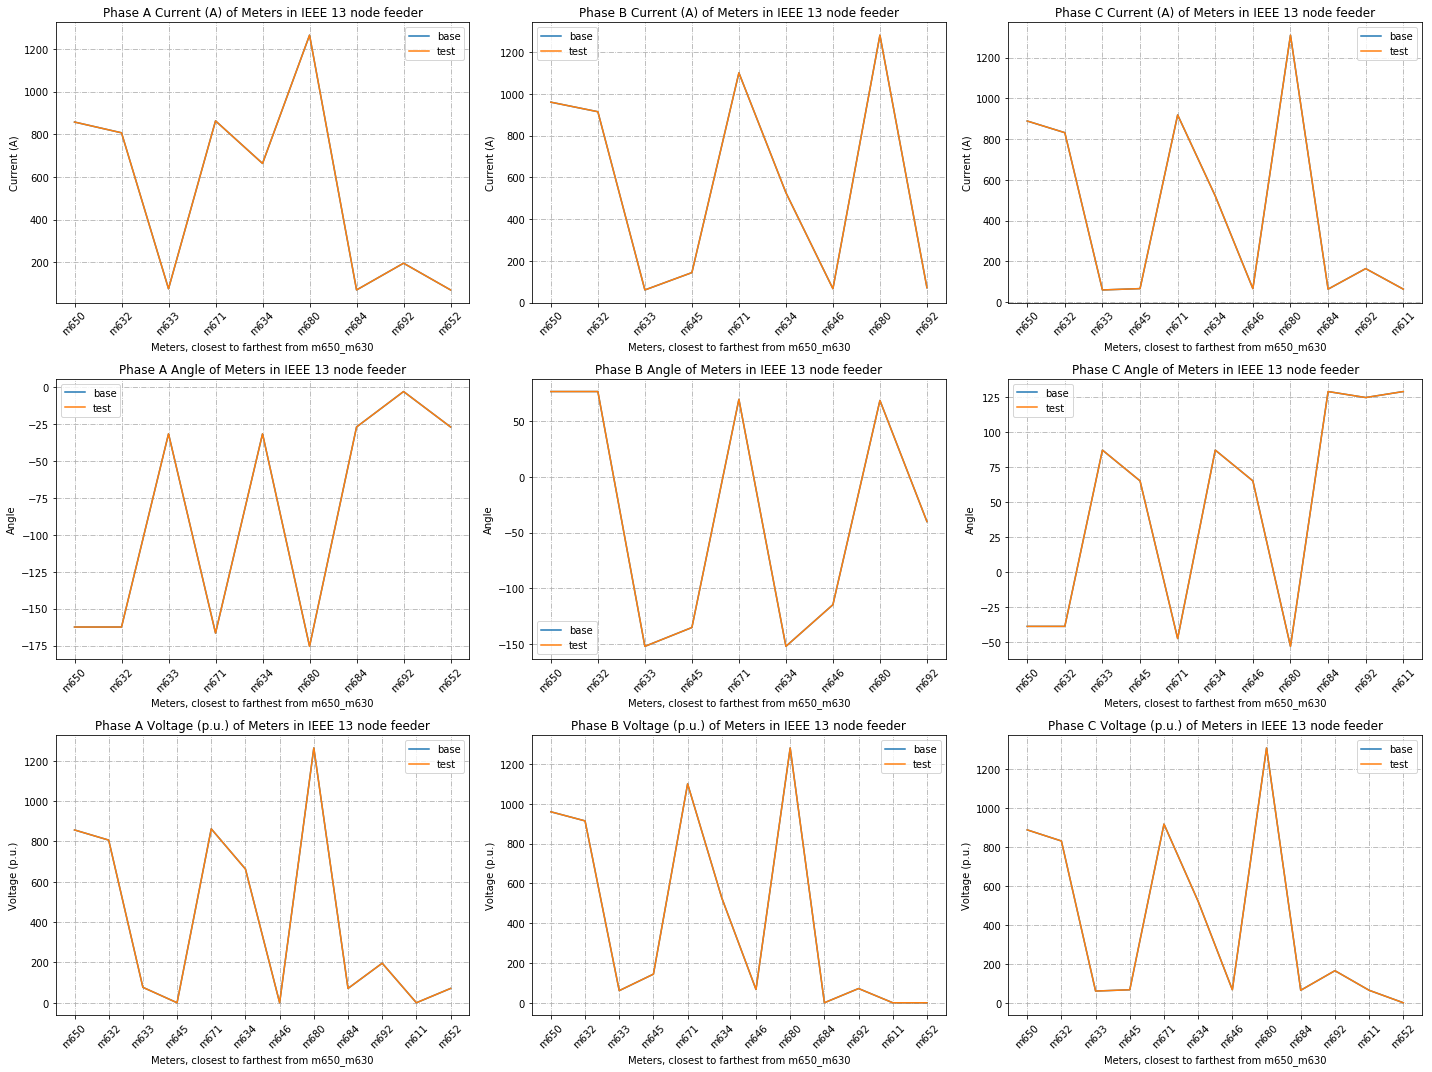

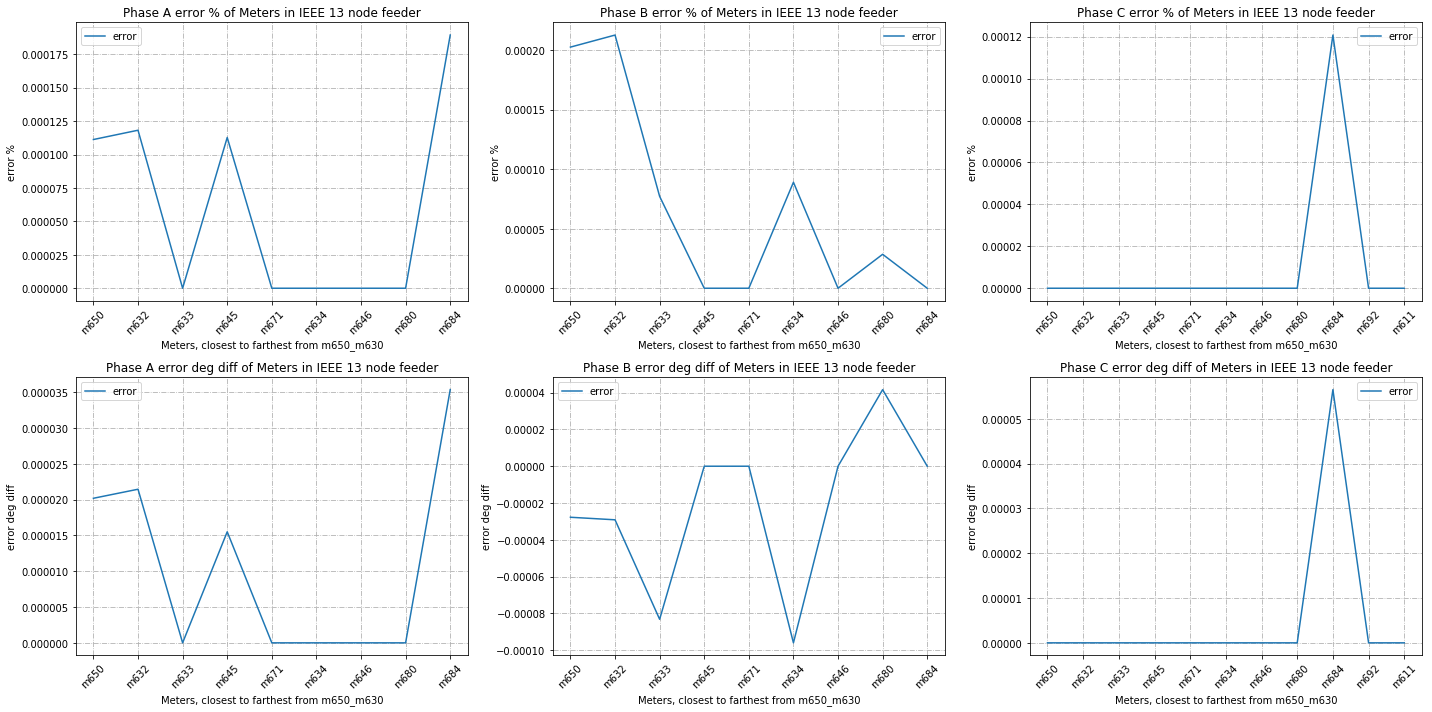

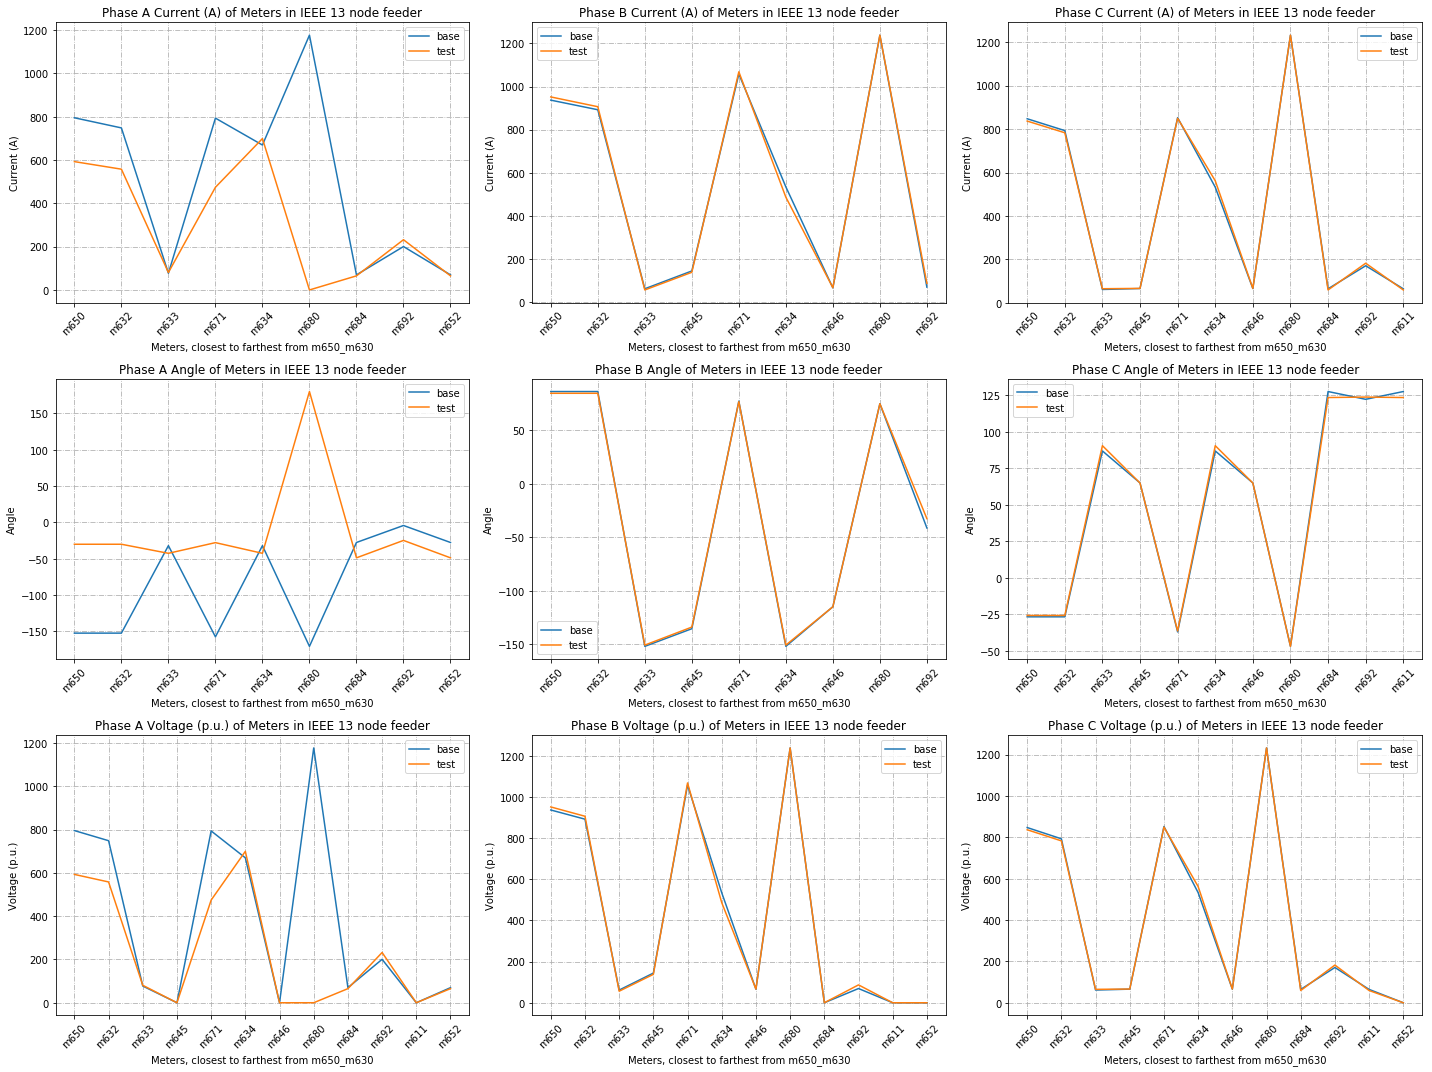

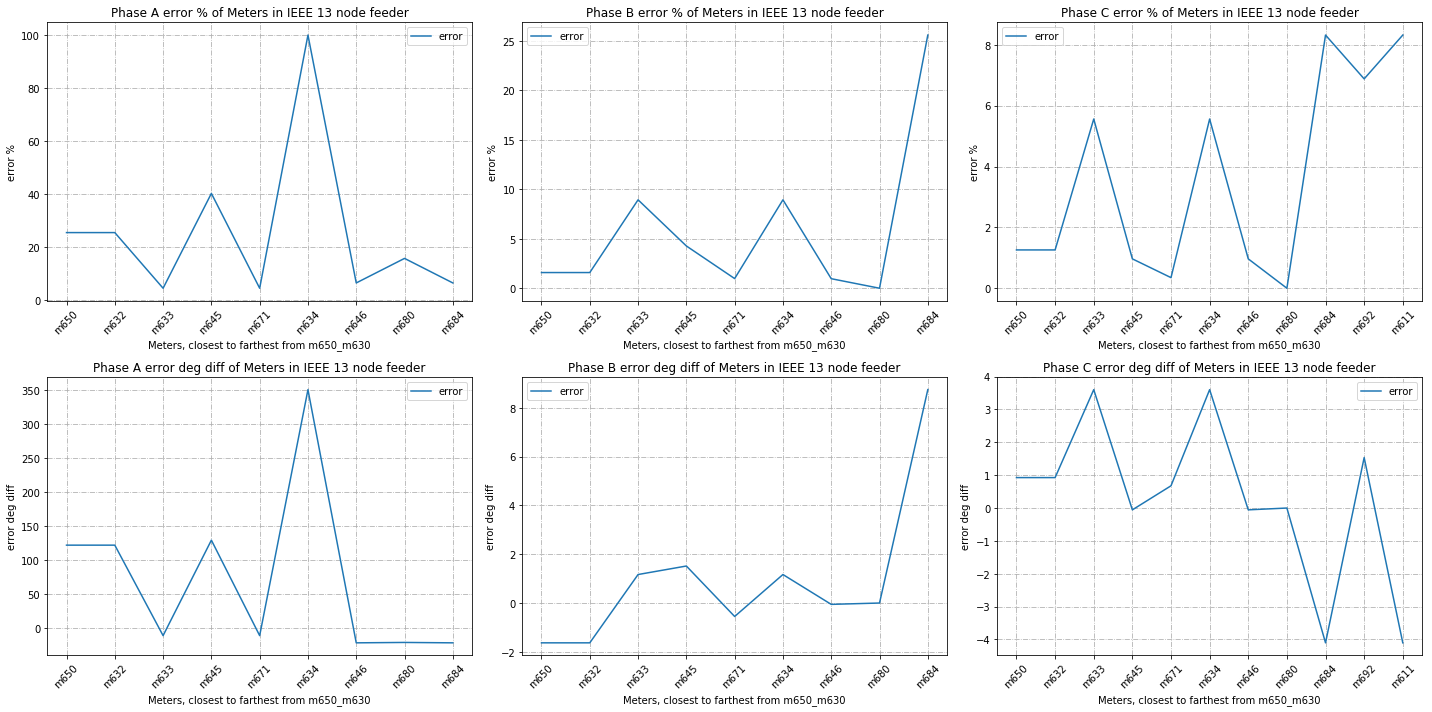

In [8]:
compare_gridlab_csv(['time_results/measured_current_A_pv.csv',
                      'time_results/measured_current_B_pv.csv',
                      'time_results/measured_current_C_pv.csv'],
                    ['time_results/measured_current_A_pv_control.csv',
                     'time_results/measured_current_B_pv_control.csv',
                     'time_results/measured_current_C_pv_control.csv'],
                      filename='Current_csv_inverter_pv_control',
                        timestep=-2)
compare_gridlab_csv(['time_results/measured_current_A_pv.csv',
                      'time_results/measured_current_B_pv.csv',
                      'time_results/measured_current_C_pv.csv'],
                    ['time_results/measured_current_A_pv_control.csv',
                     'time_results/measured_current_B_pv_control.csv',
                     'time_results/measured_current_C_pv_control.csv'],
                      filename='Current_csv_inverter_pv_control',
                        timestep=-1)

# also do an inverter voltage and current by time plot

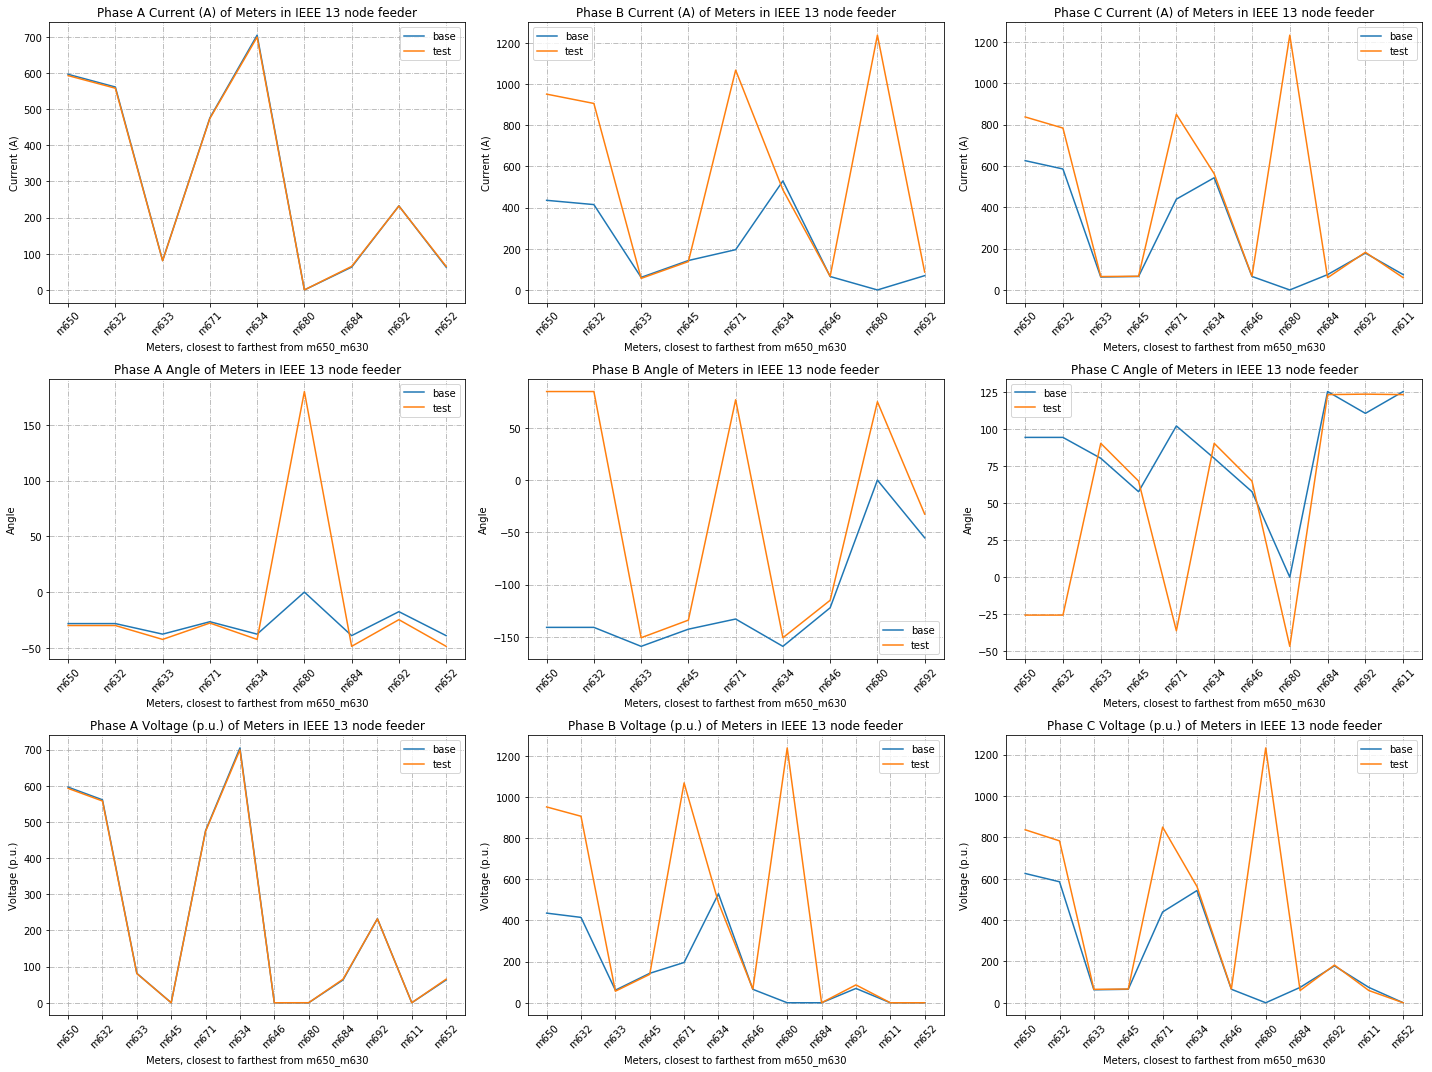

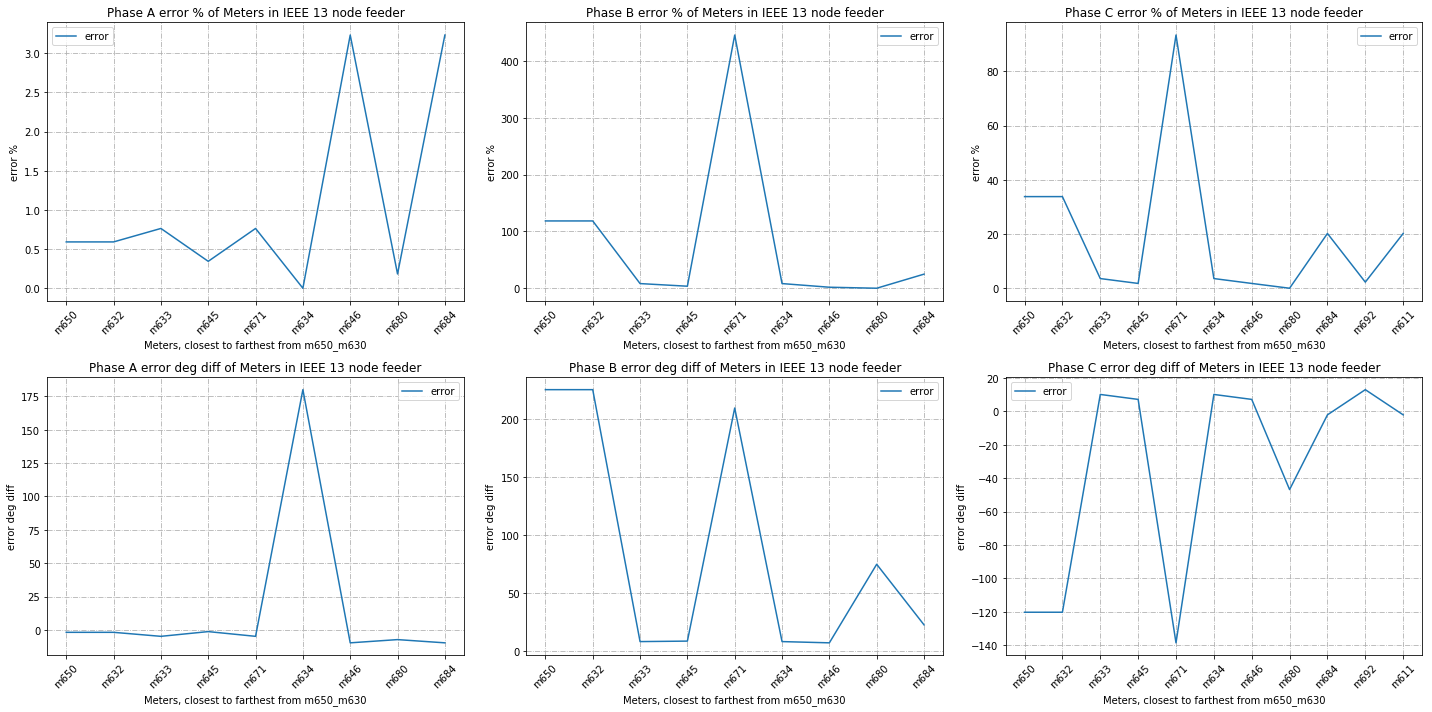

In [40]:
compare_gridlab_csv(['time_results/measured_current_A.csv',
                     'time_results/measured_current_B.csv',
                     'time_results/measured_current_C.csv'],
                     ['time_results/measured_current_A_pv.csv',
                      'time_results/measured_current_B_pv.csv',
                      'time_results/measured_current_C_pv.csv'],
                      filename='Current_csv_inverter_mod_2',
                        timestep=-1)

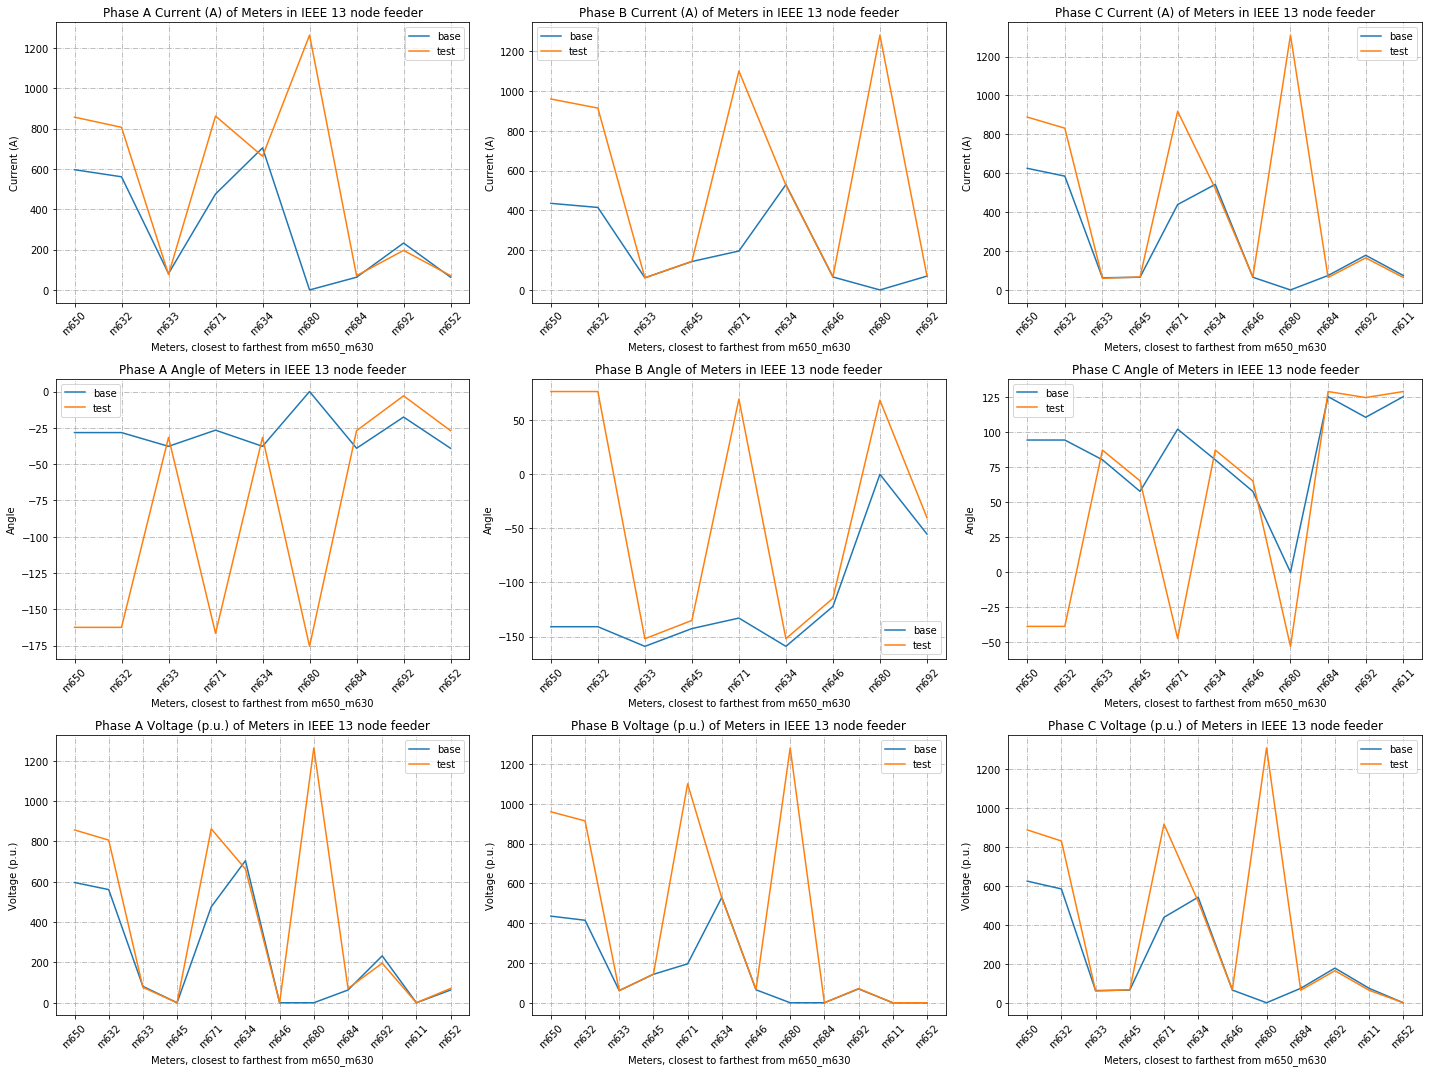

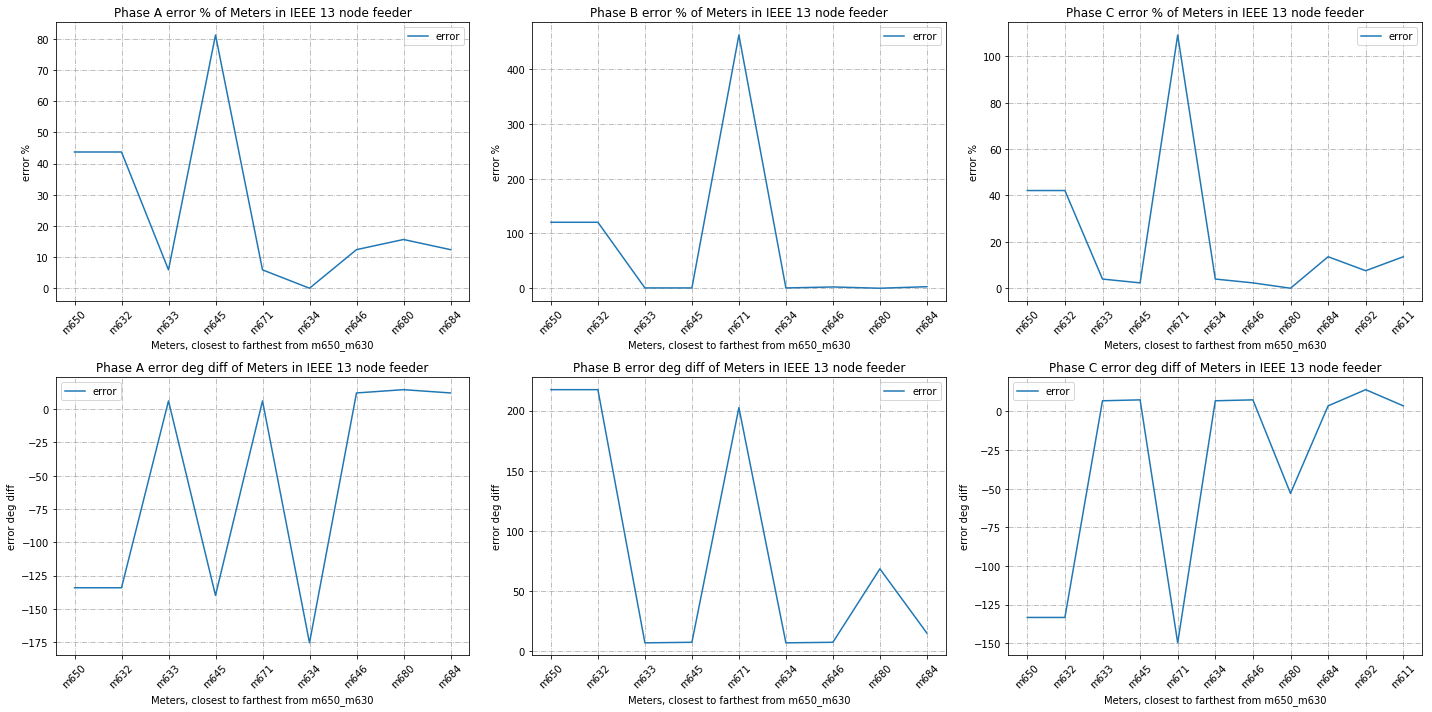

In [41]:
compare_gridlab_csv(['time_results/measured_current_A.csv',
                     'time_results/measured_current_B.csv',
                     'time_results/measured_current_C.csv'],
                     ['time_results/measured_current_A_pv.csv',
                      'time_results/measured_current_B_pv.csv',
                      'time_results/measured_current_C_pv.csv'],
                      filename='Current_csv_inverter_mod_2',
                        timestep=-2)

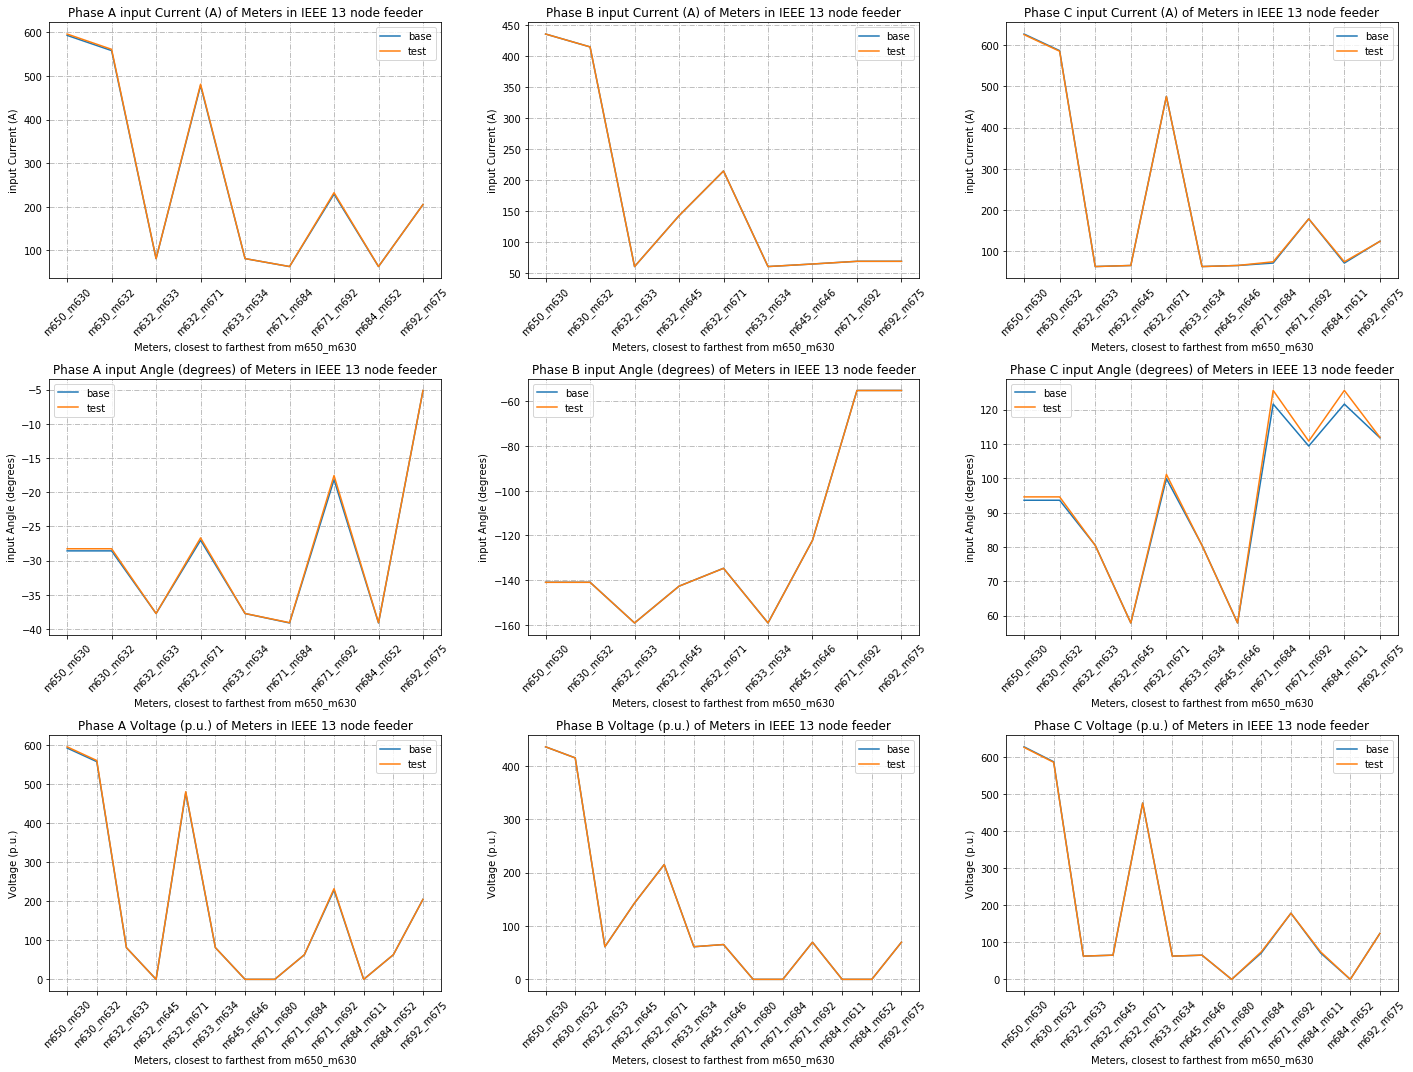

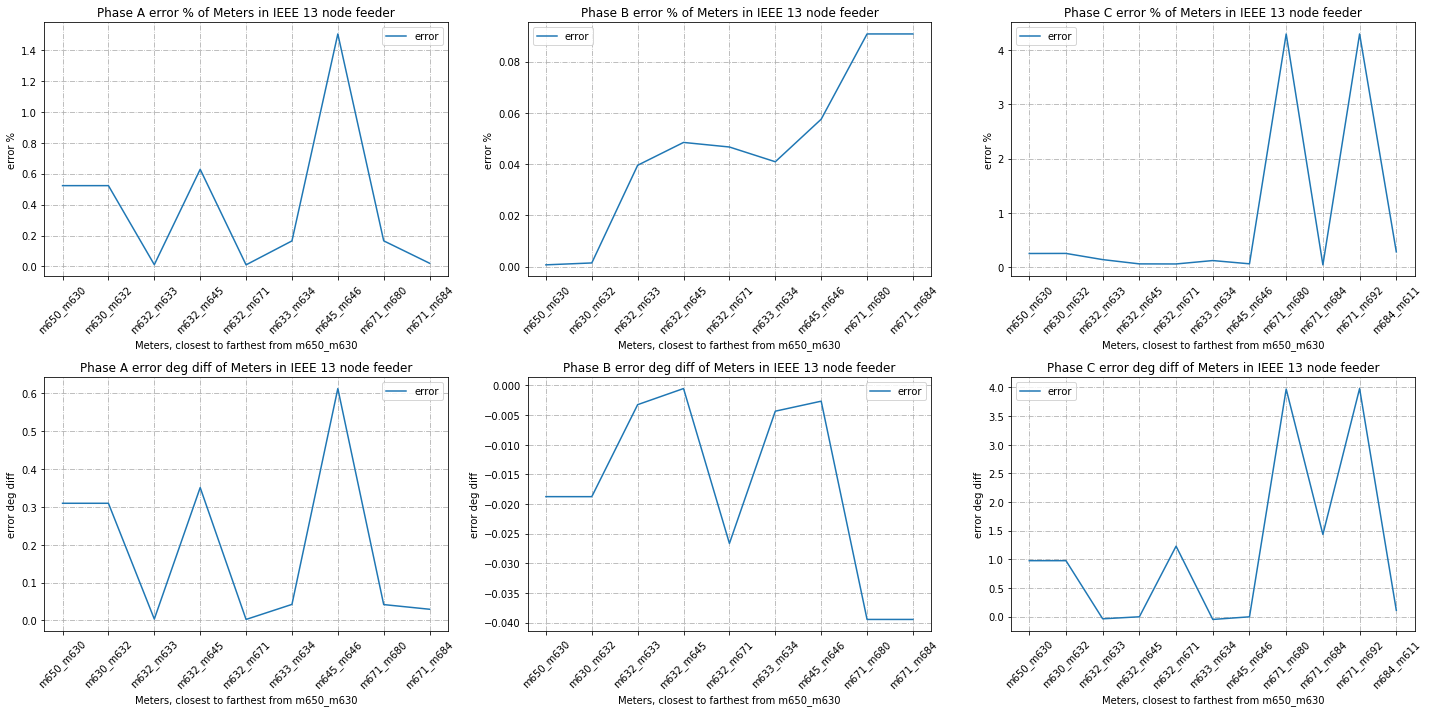

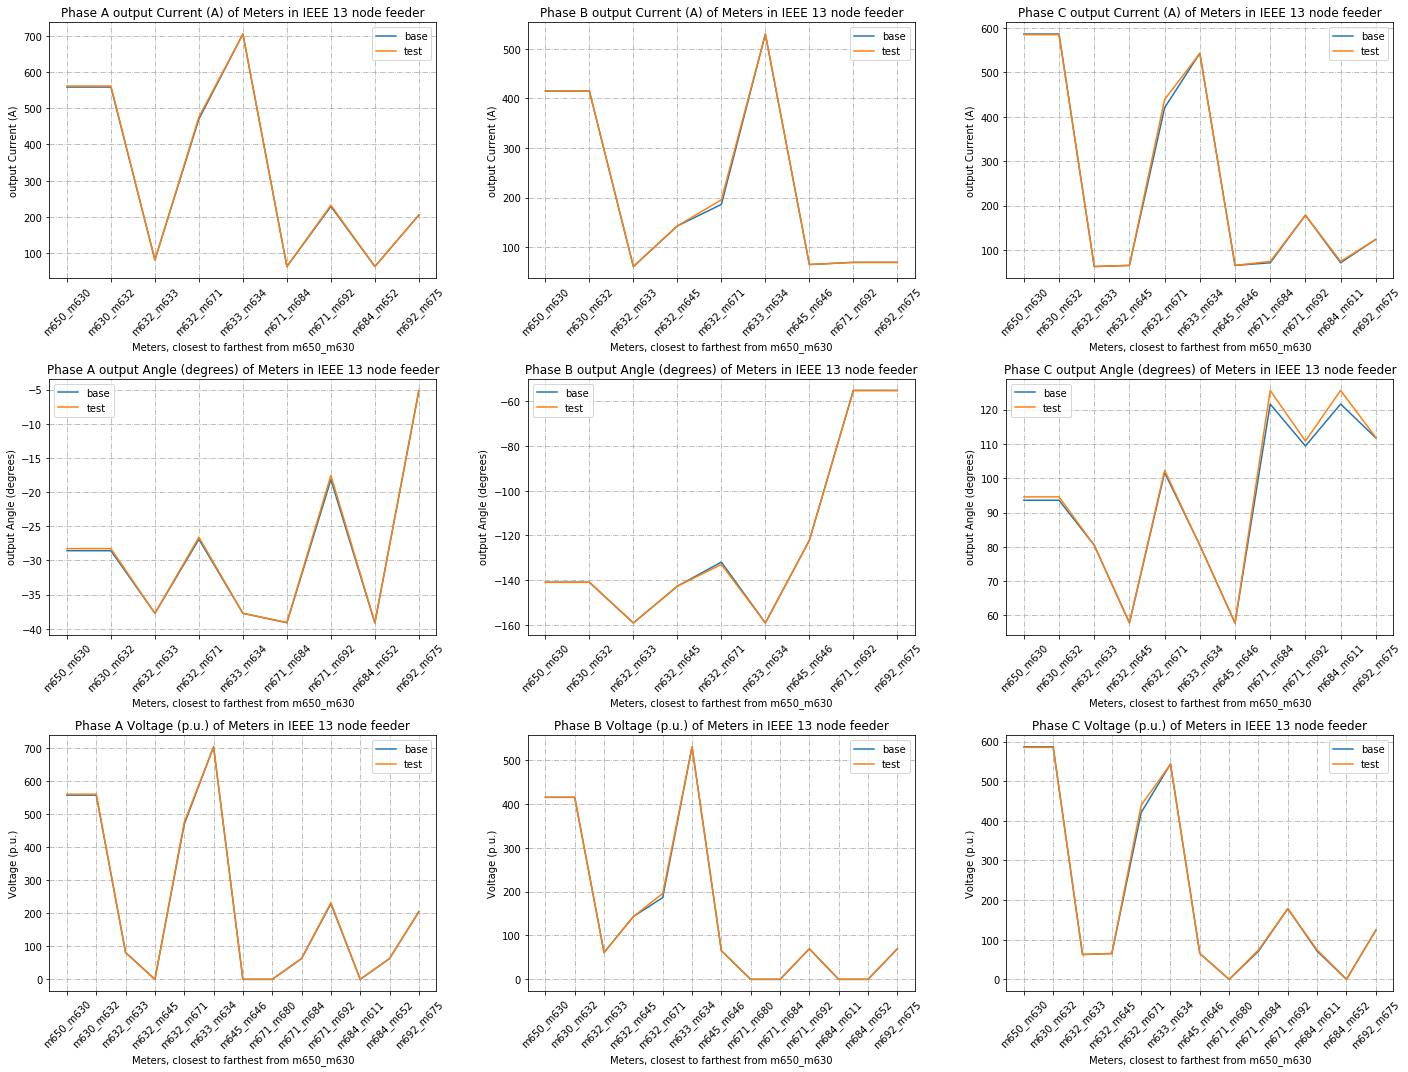

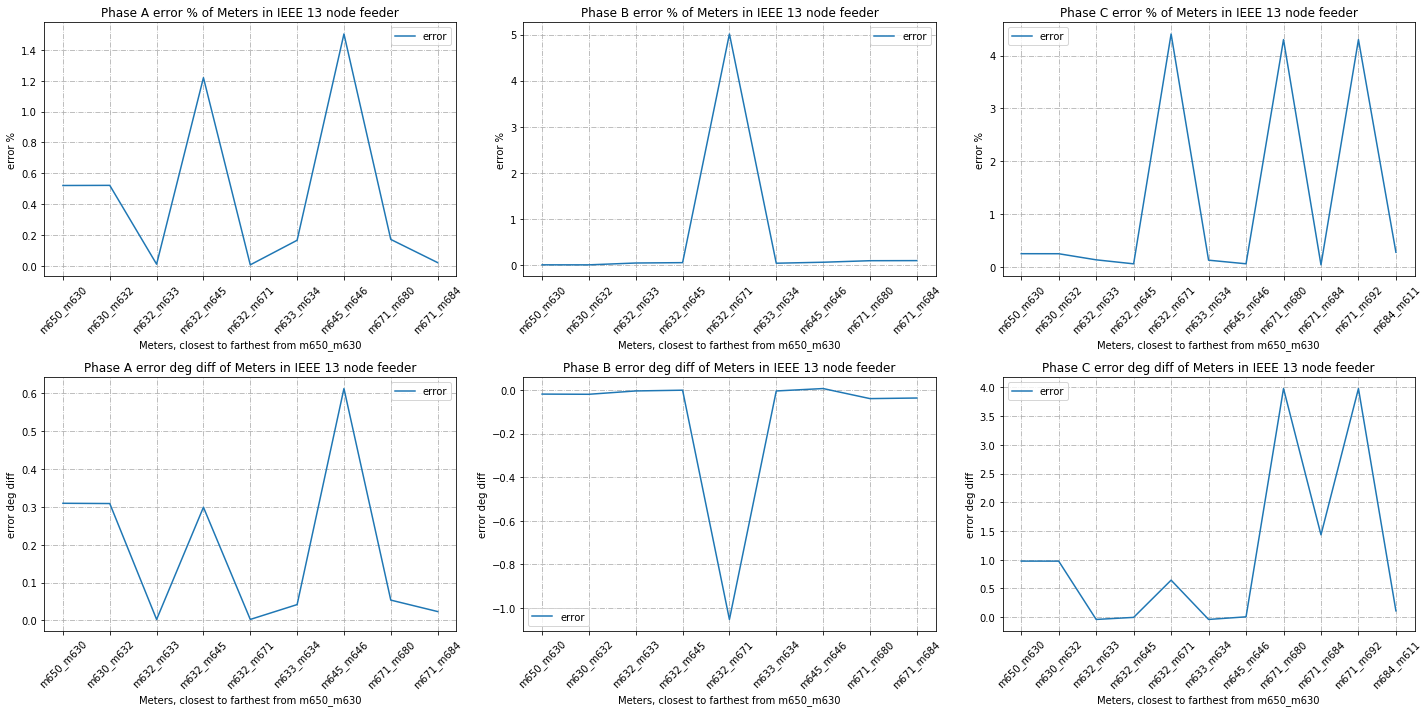

In [66]:
    
compare_gridlab_IEEE('IEEE13_eric.xml', filename='current_control')

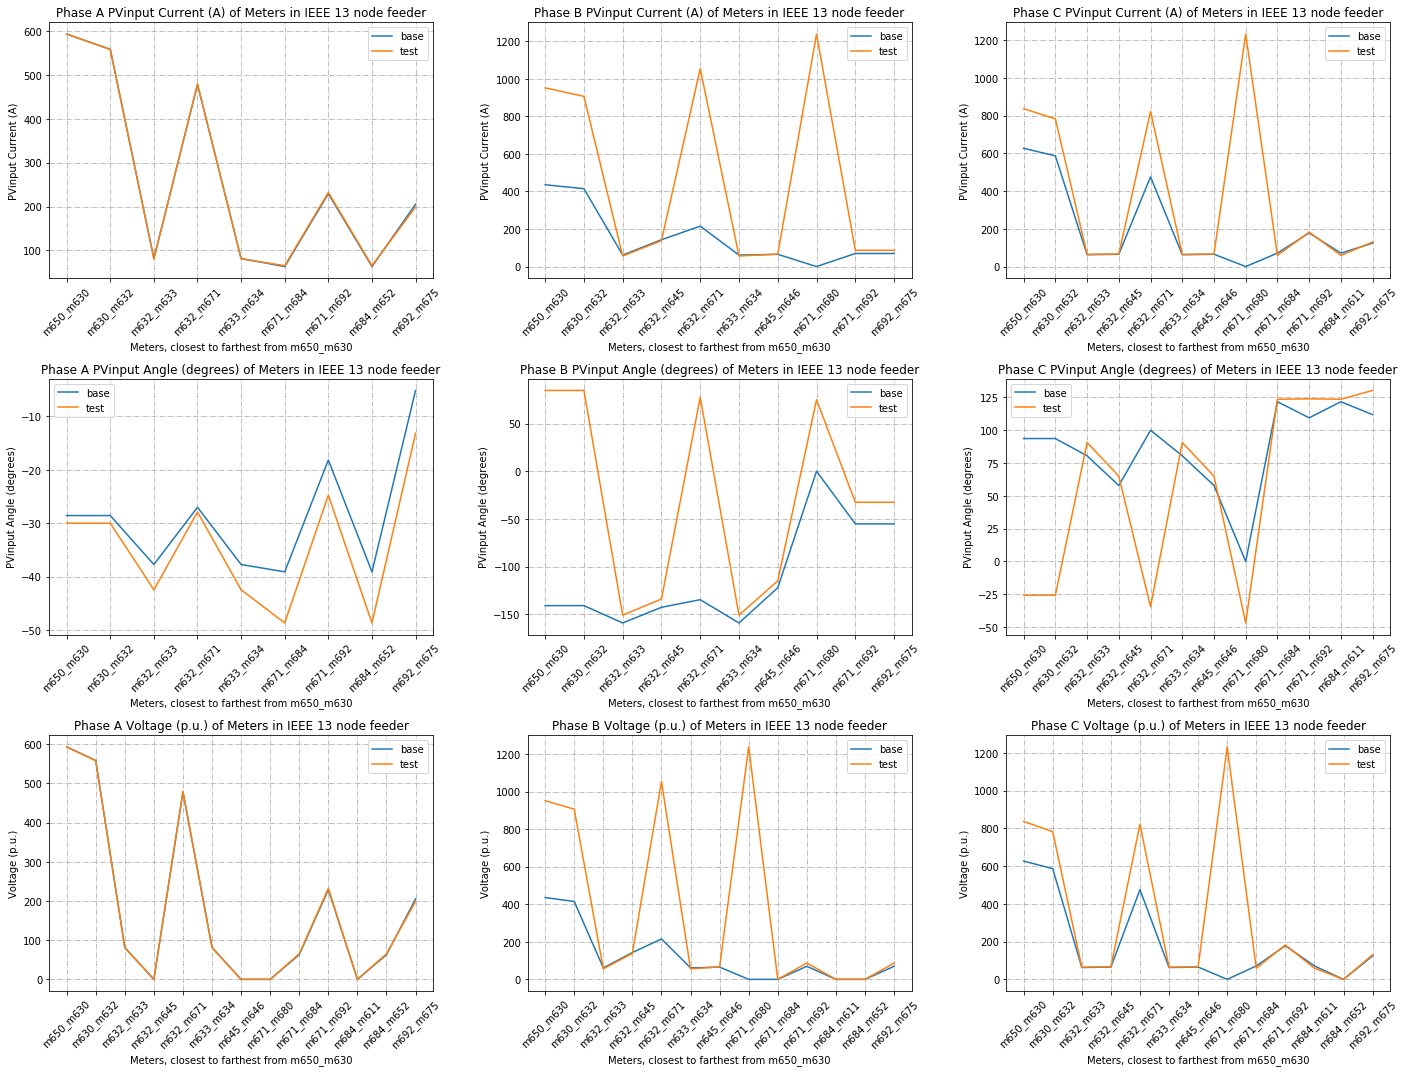

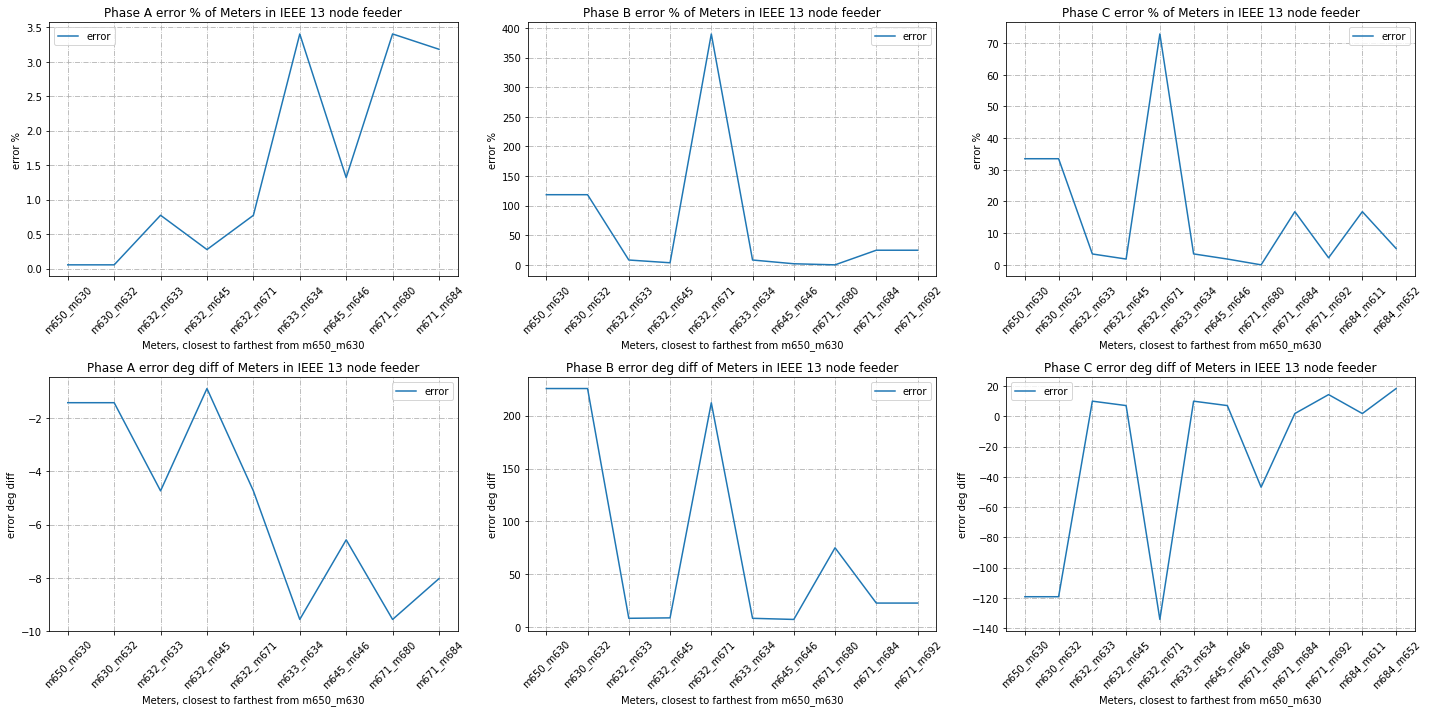

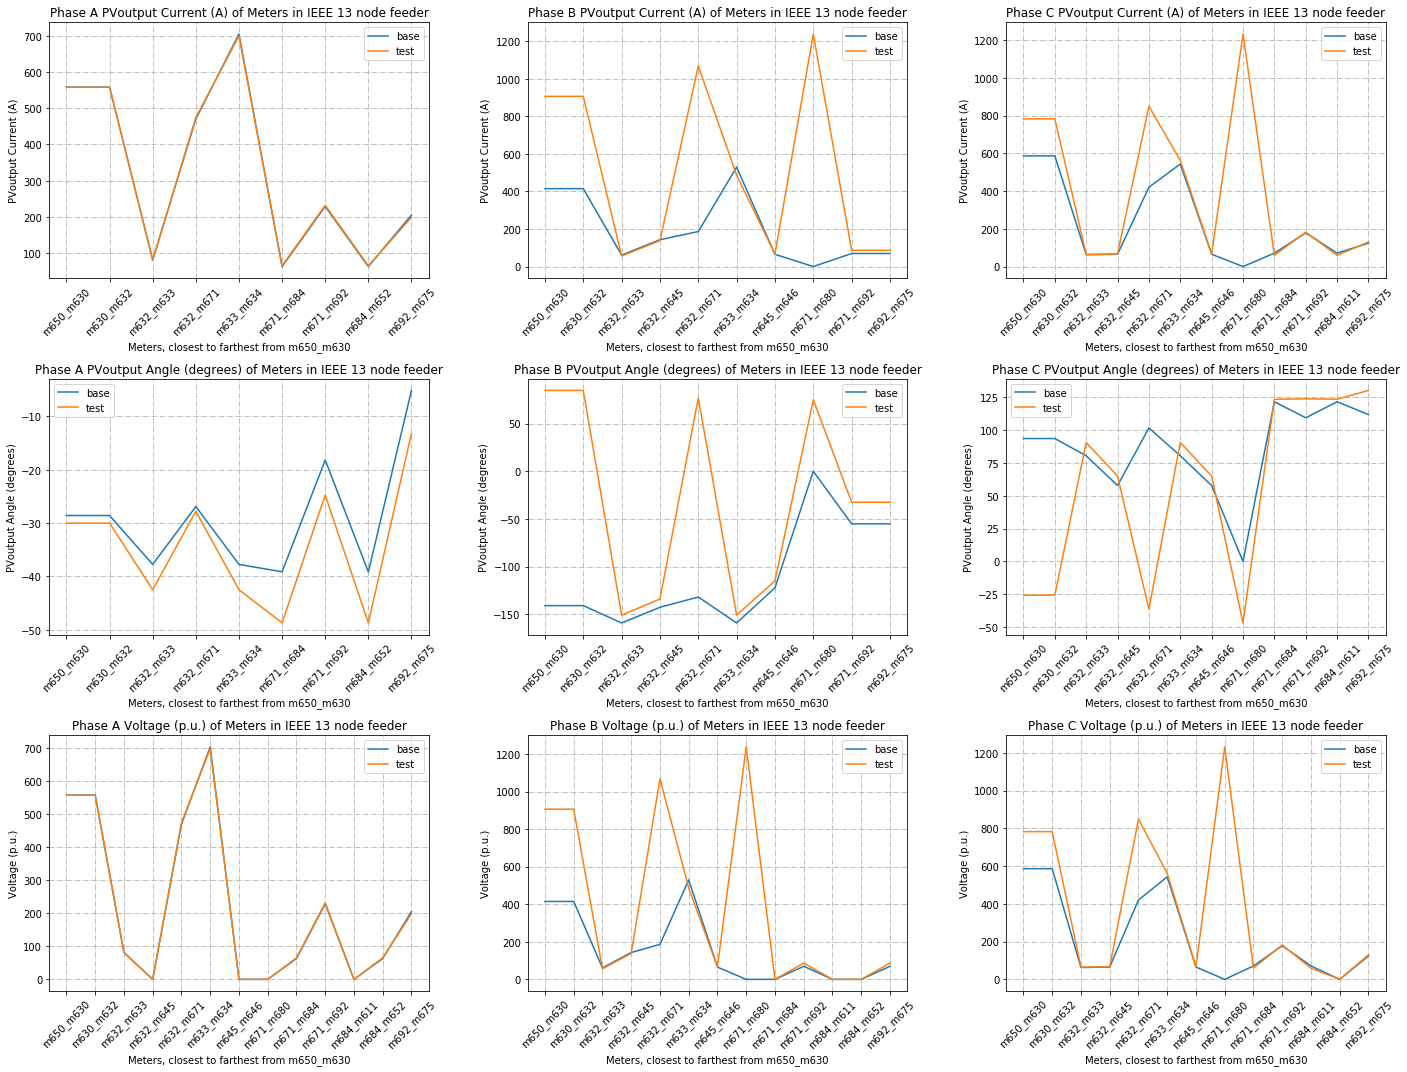

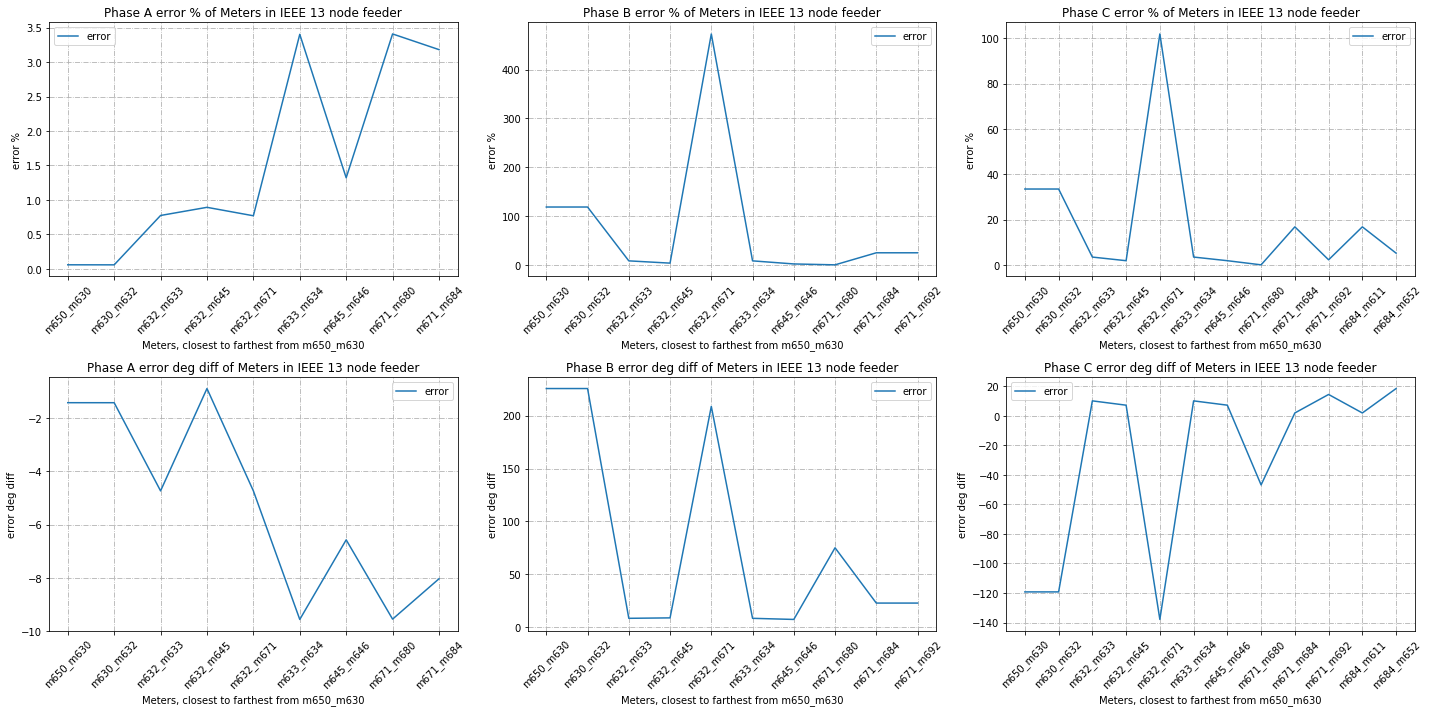

In [16]:
compare_gridlab_IEEE('IEEE13_pv1.xml', 'PV', 'current_pv_1')

In [7]:
# I can either start resorting the meters by distance from m630 or I can get the currents for the lines. 
# If I work on getting current from the lines then I have to work on overground, underground lines, and then switches. 
# then I have to work on getting the IEEE data. 
    
input_to_amp_phase, input_to_deg_phase, input_from_amp_phase, input_from_deg_phase = get_meter_currents('IEEE13_eric.xml')
# I work on going to that glm-plotter after and add power data to it. 


In [67]:
def curr_plt(phase="A", mname_lst=None,
            input_to_amp_phase   = input_to_amp_phase    ,
            input_to_deg_phase   = input_to_deg_phase    ,
            input_from_amp_phase = input_from_amp_phase  ,
            input_from_deg_phase = input_from_deg_phase  ,):
    input_to_amp   = input_to_amp_phase[phase]
    input_to_deg   = input_to_deg_phase[phase]
    input_from_amp = input_from_amp_phase[phase]
    input_from_deg = input_from_deg_phase[phase]
    IEEE13_to_amp = IEEE13_to_amp_phase[phase]
    IEEE13_to_deg = IEEE13_to_deg_phase[phase]
    IEEE13_from_amp = IEEE13_from_amp_phase[phase]
    IEEE13_from_deg = IEEE13_from_deg_phase[phase]
    mname_lst, _, _, err_mag_to = two_dict_plt(IEEE13_to_amp, input_to_amp, phase, 'Current (A)', 'to', mname_lst)
    mname_lst, _, _, err_ang_to = two_dict_plt(IEEE13_to_deg, input_to_deg, phase, 'degrees', 'to', mname_lst)
    mname_lst, _, _, err_mag_from = two_dict_plt(IEEE13_from_amp, input_from_amp, phase, 'Current (A)', 'from',  mname_lst)
    mname_lst, _, _, err_ang_from = two_dict_plt(IEEE13_from_deg, input_from_deg, phase, 'degrees', 'from', mname_lst)
    err_mag_to_dict = {key:val for key,val in zip(mname_lst, err_mag_to)}
    err_ang_to_dict = {key:val for key,val in zip(mname_lst, err_ang_to)}
    err_mag_from_dict = {key:val for key,val in zip(mname_lst, err_mag_from)}
    err_ang_from_dict = {key:val for key,val in zip(mname_lst, err_ang_from)}

    return err_mag_to_dict, err_ang_to_dict, err_mag_from_dict, err_ang_from_dict

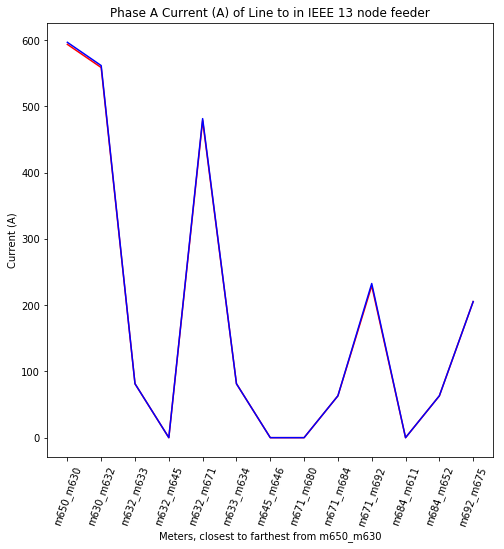

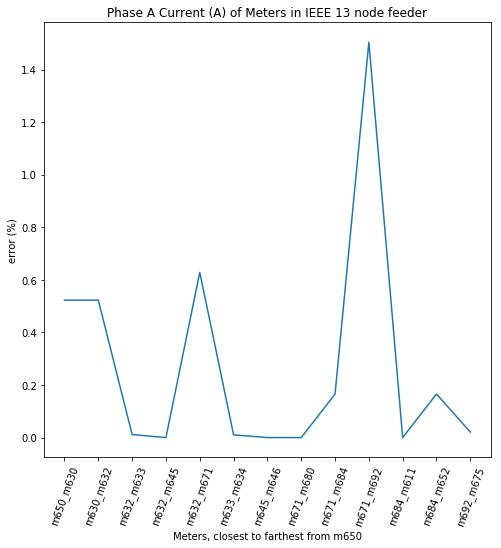

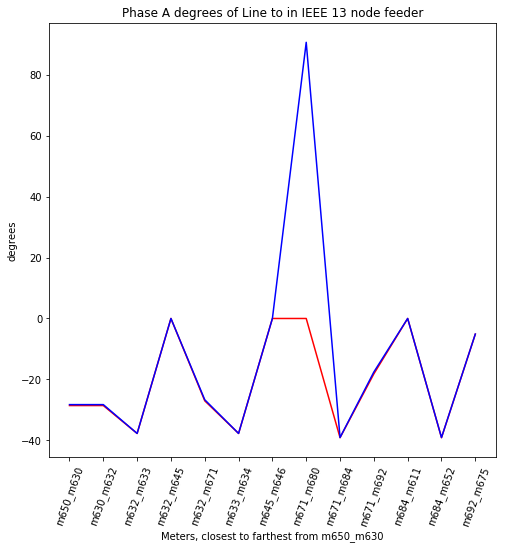

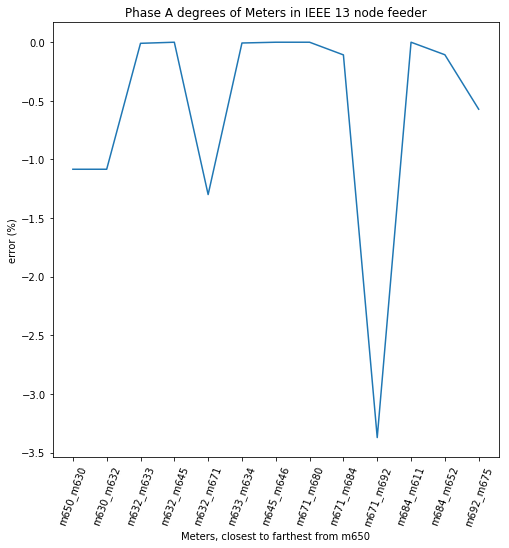

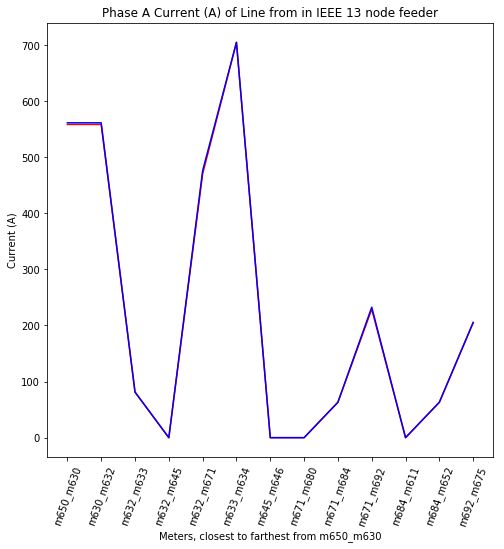

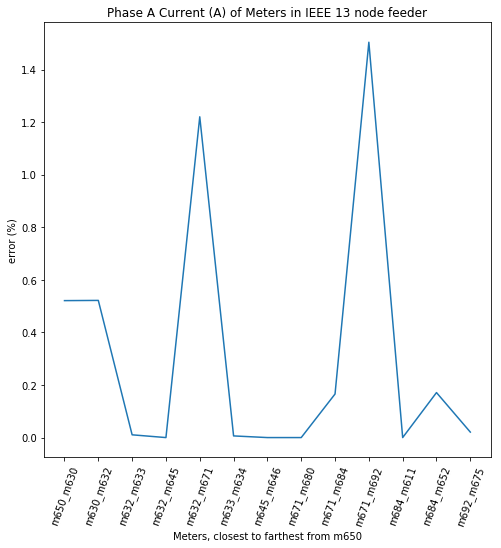

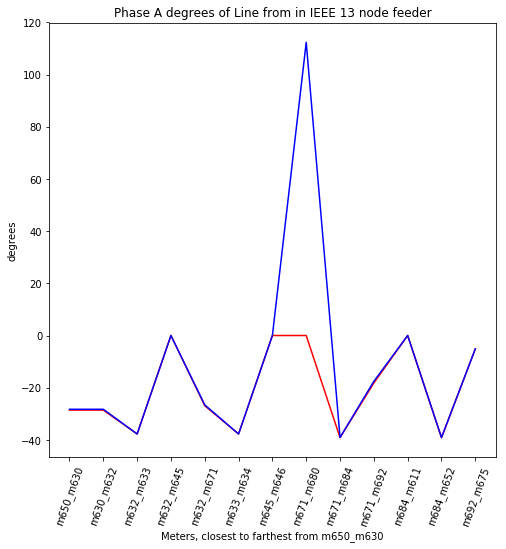

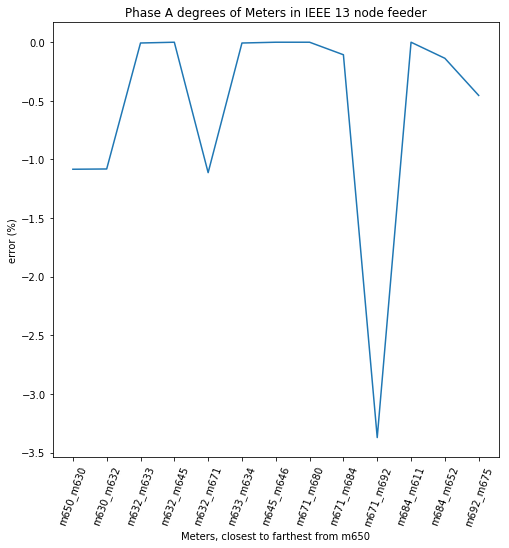

In [68]:
err_mag_to_dict_A, err_ang_to_dict_A, err_mag_from_dict_A, err_ang_from_dict_A = curr_plt("A", mname_lst)

In [69]:
print(err_ang_to_dict_A)
b = input_to_deg_phase['A']['m692_m675']
a = IEEE13_to_deg_phase['A']['m692_m675']
print(b)
print(a)
print((abs(b-a) / a )* 100)


{'m671_m684': -0.10802741398487872, 'm632_m671': -1.2992154193738288, 'm684_m652': -0.10680143406063683, 'm650_m630': -1.083448918268578, 'm633_m634': -0.006596154364833906, 'm645_m646': 0.0, 'm692_m675': -0.5713313038554674, 'm684_m611': 0.0, 'm632_m645': 0.0, 'm632_m633': -0.009334532724448032, 'm671_m680': 0.0, 'm630_m632': -1.0833735084756078, 'm671_m692': -3.37188229152149}
-5.120576437851444
-5.15
-0.5713313038554674


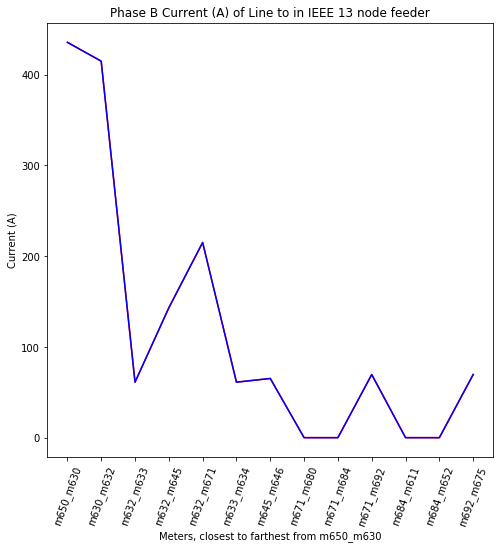

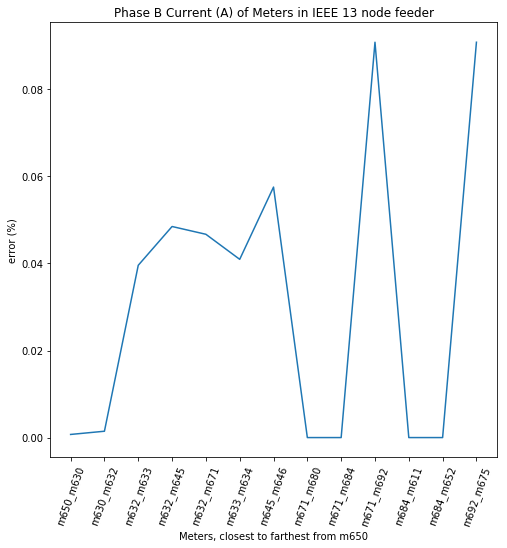

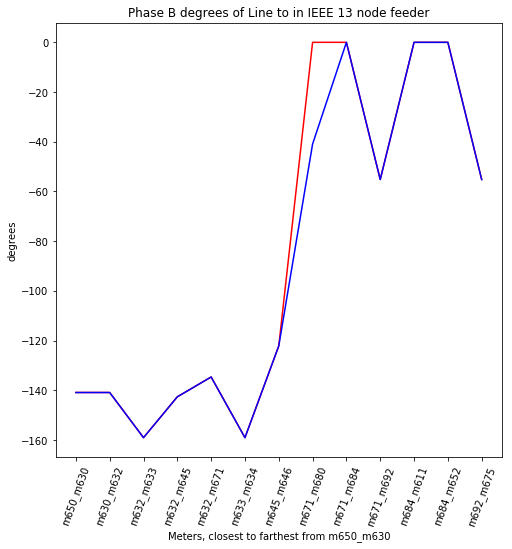

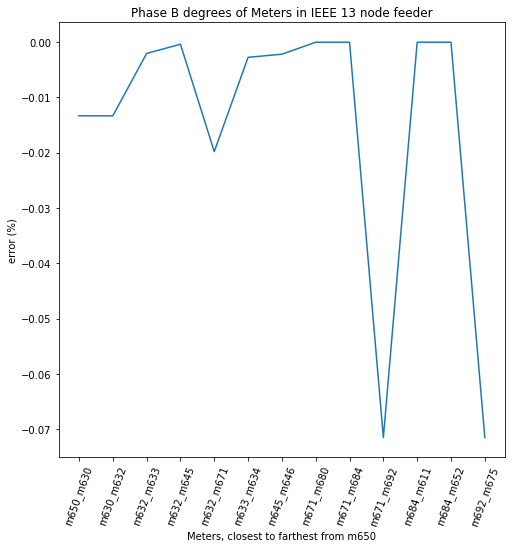

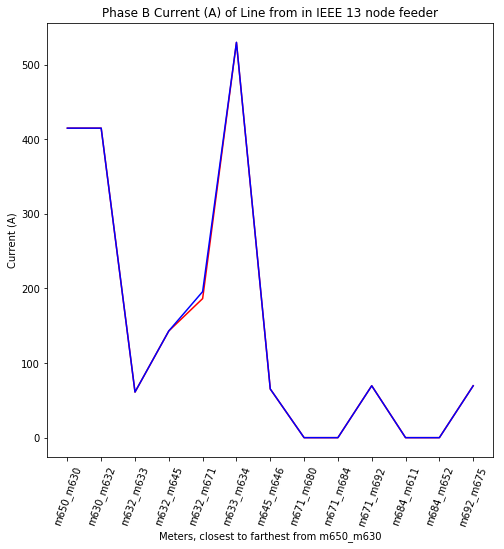

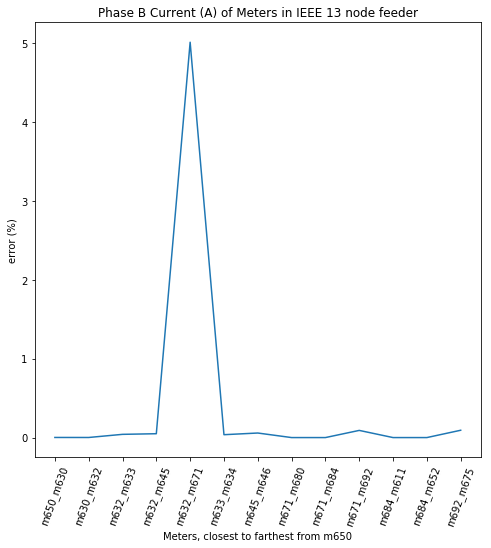

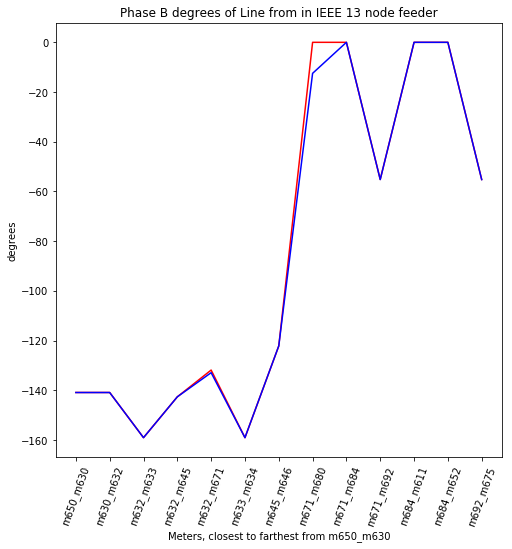

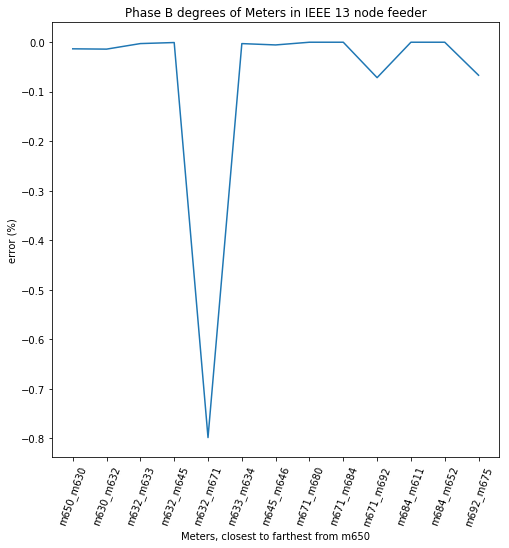

In [70]:
err_mag_to_dict_B, err_ang_to_dict_B, err_mag_from_dict_B, err_ang_from_dict_B = curr_plt("B", mname_lst)

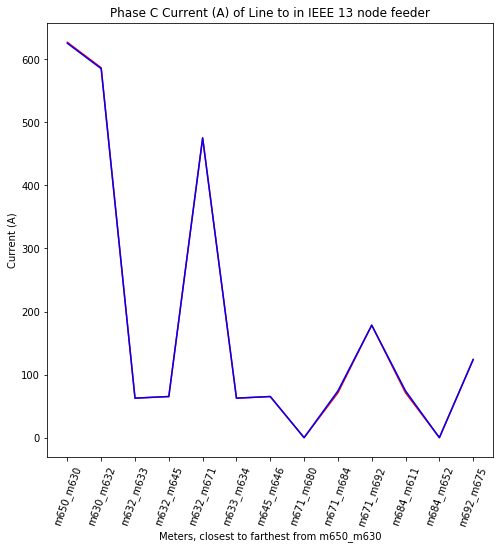

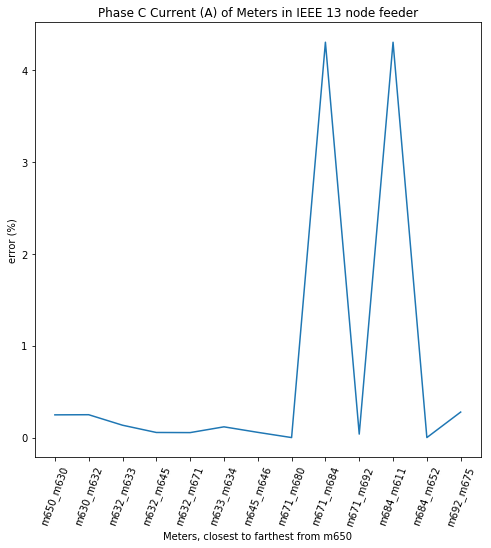

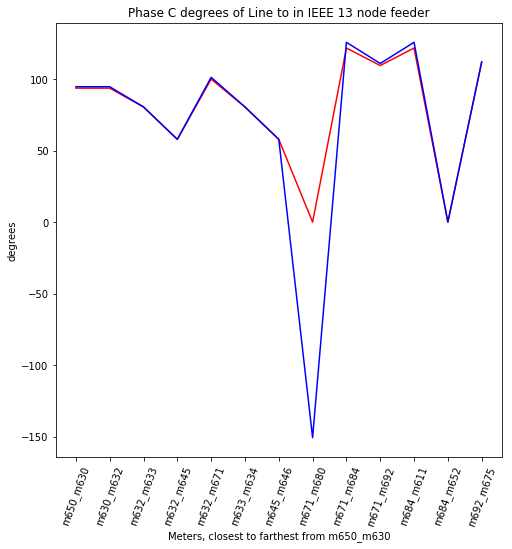

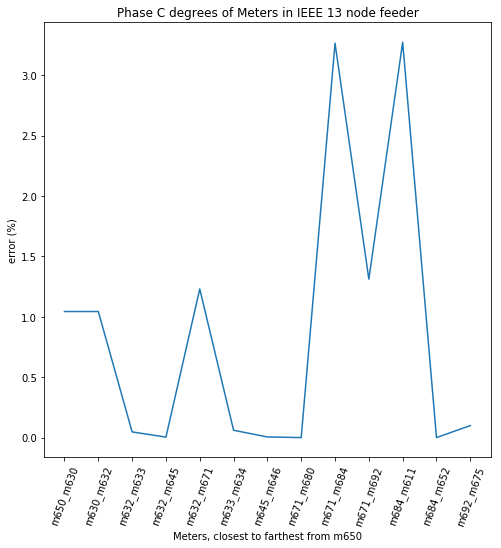

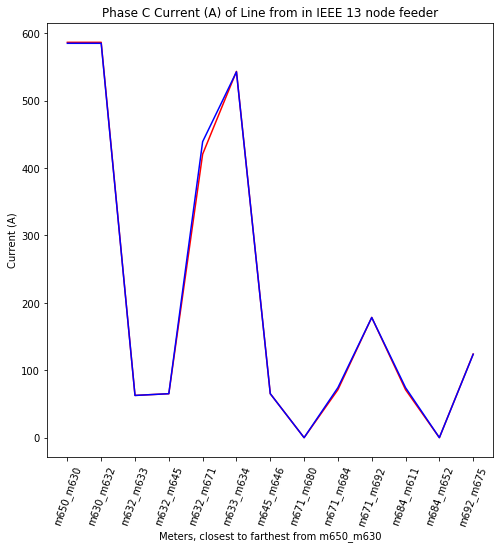

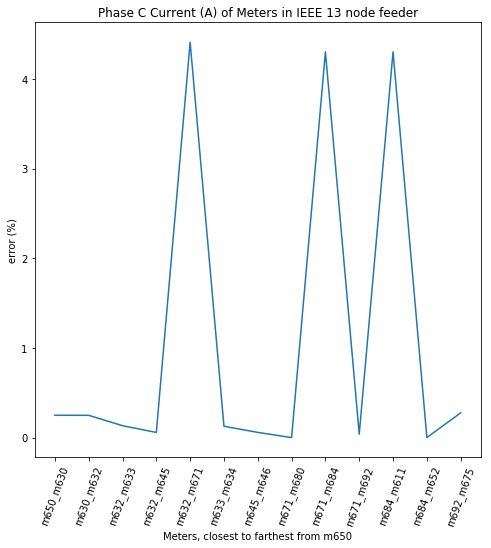

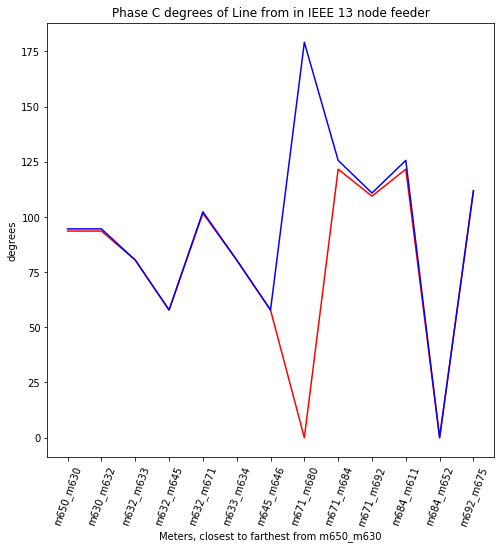

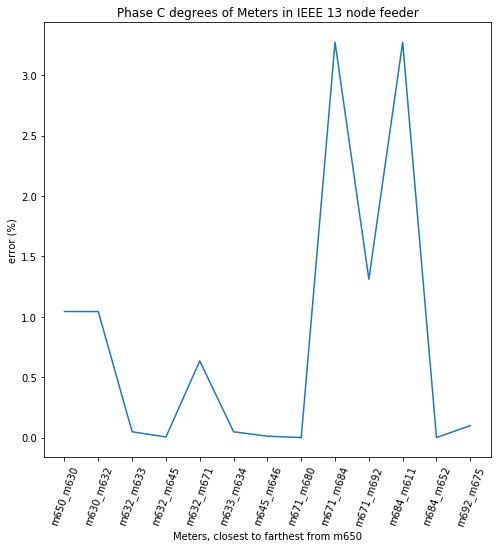

In [75]:
err_mag_to_dict_C, err_ang_to_dict_C, err_mag_from_dict_C, err_ang_from_dict_C = curr_plt("C", mname_lst)


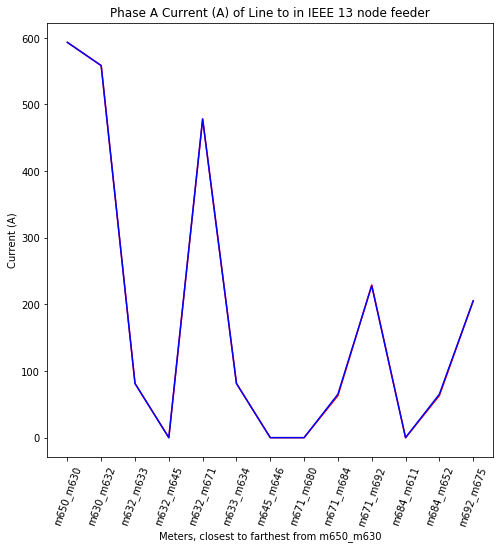

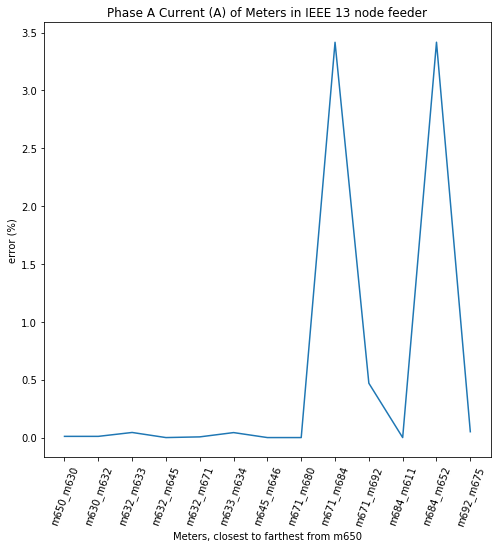

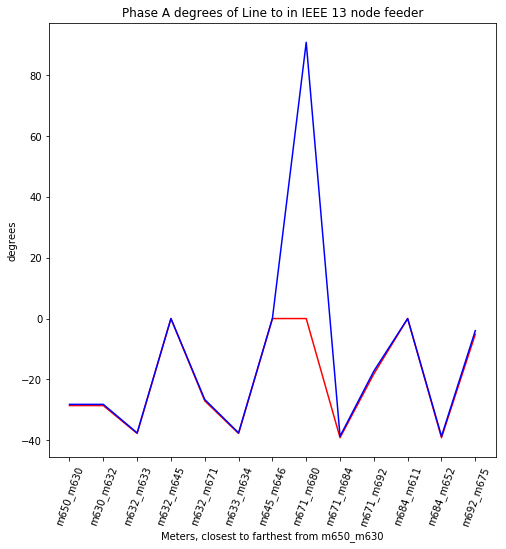

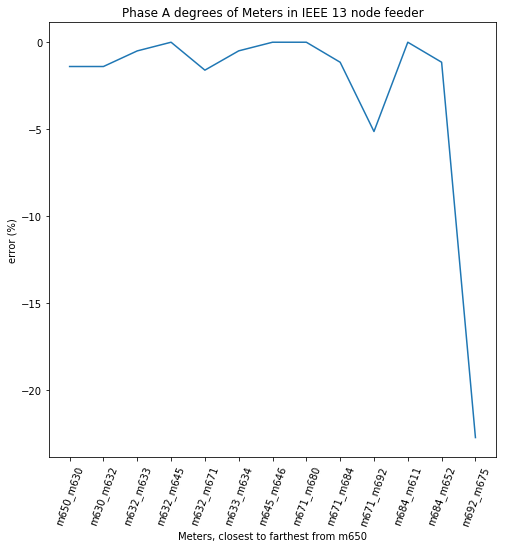

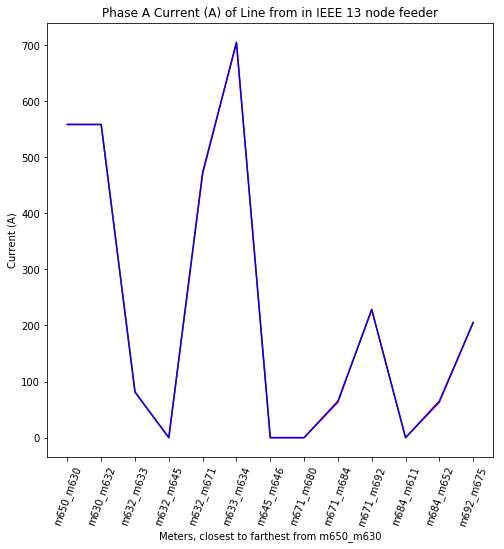

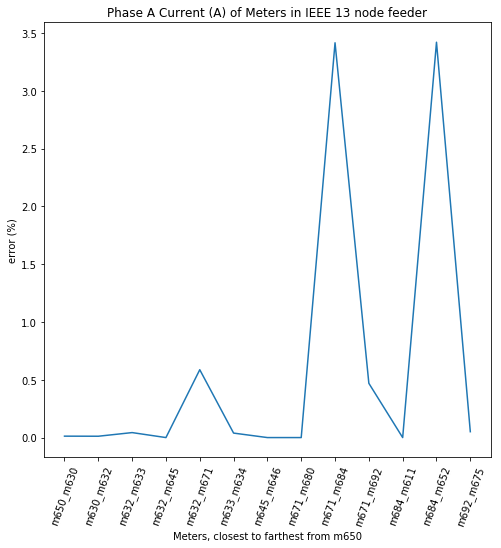

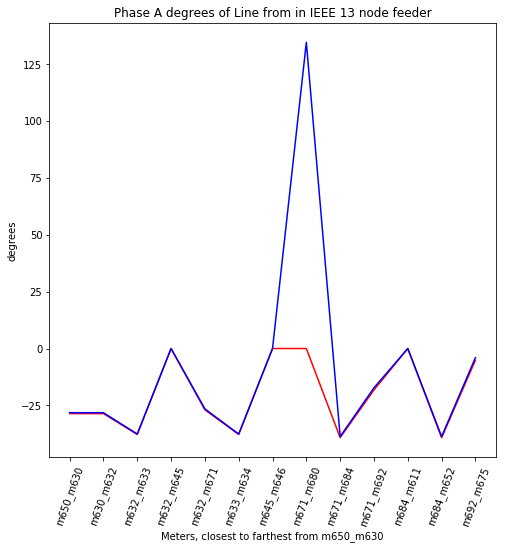

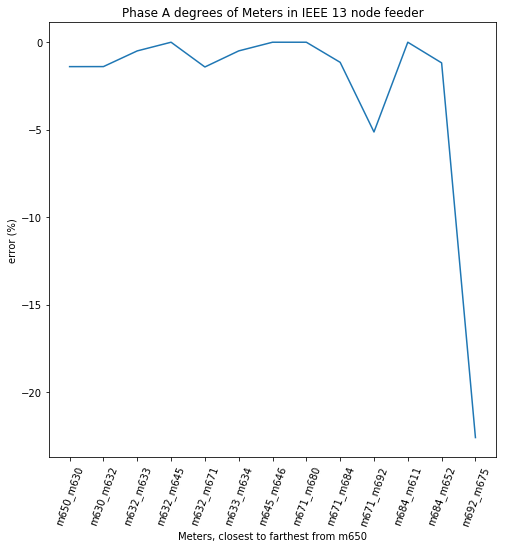

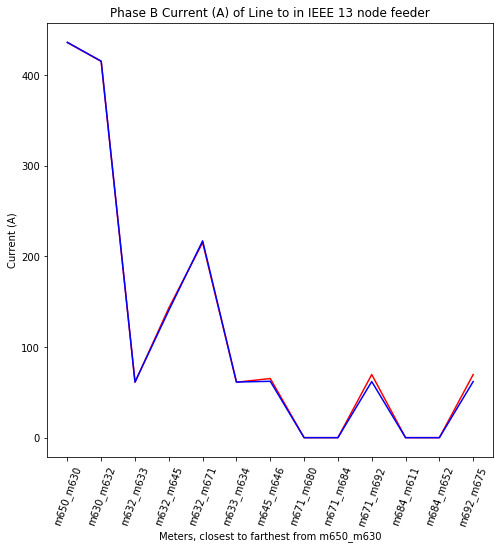

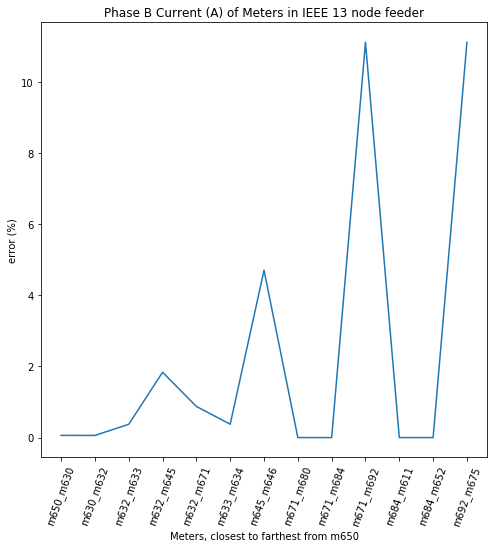

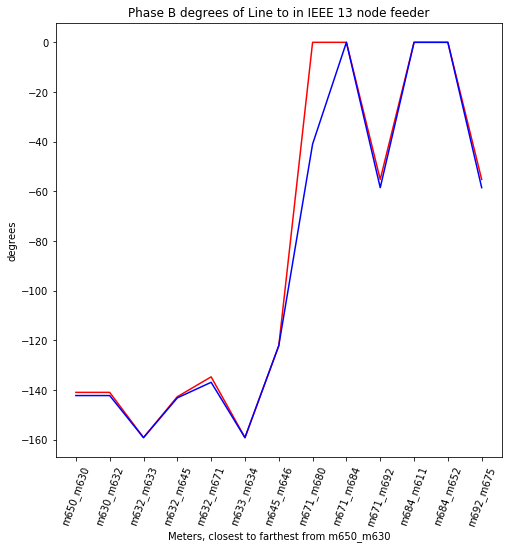

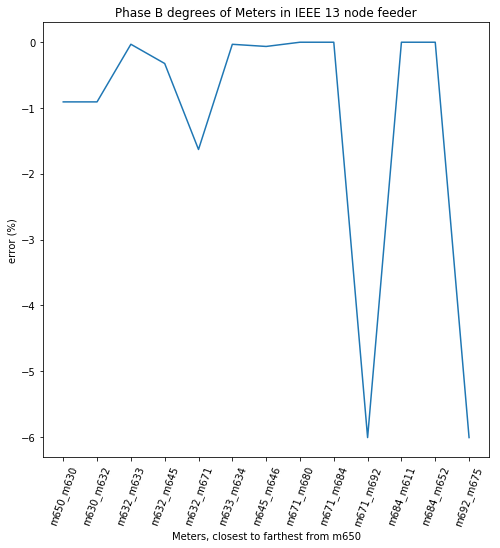

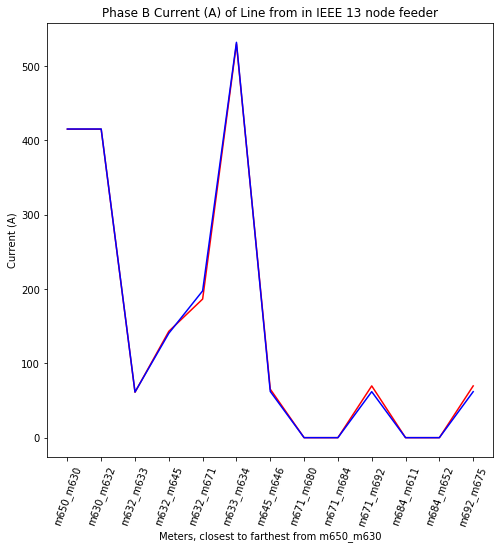

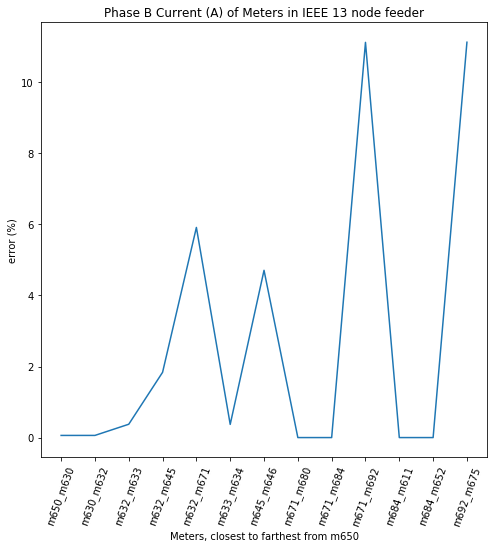

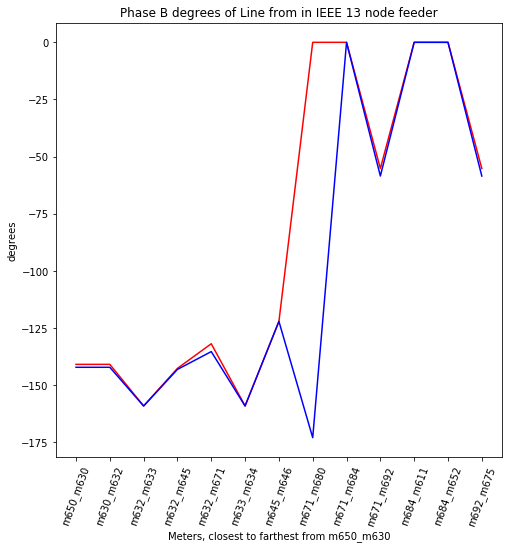

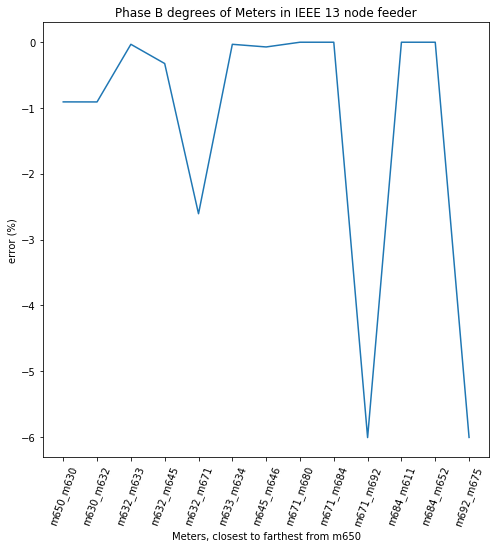

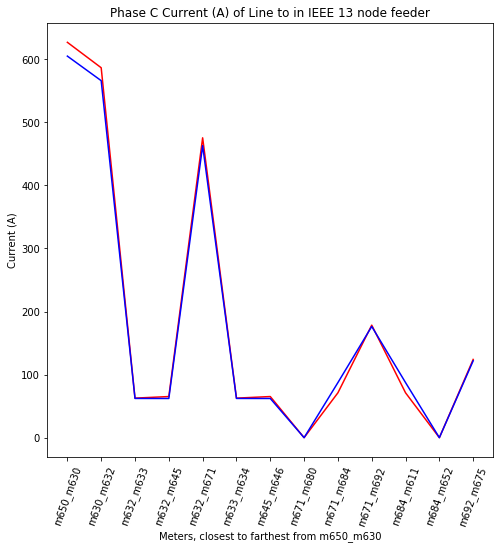

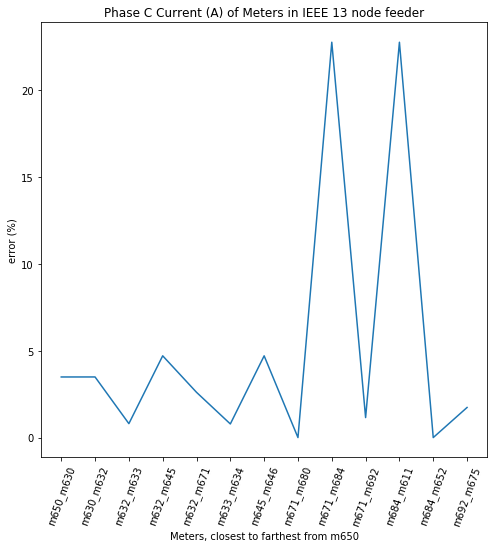

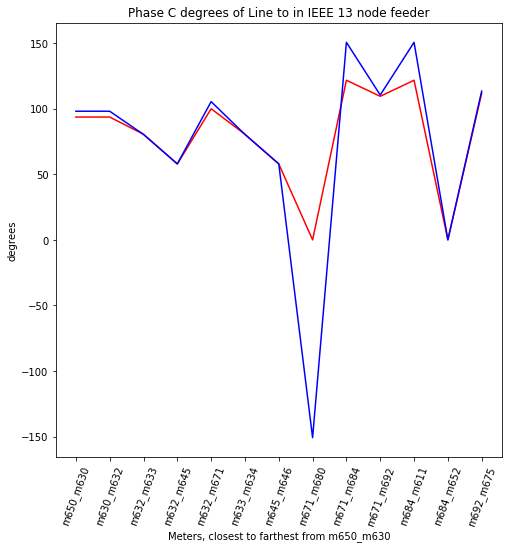

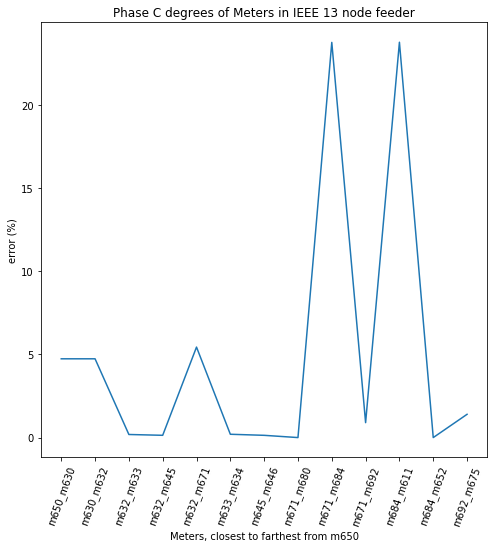

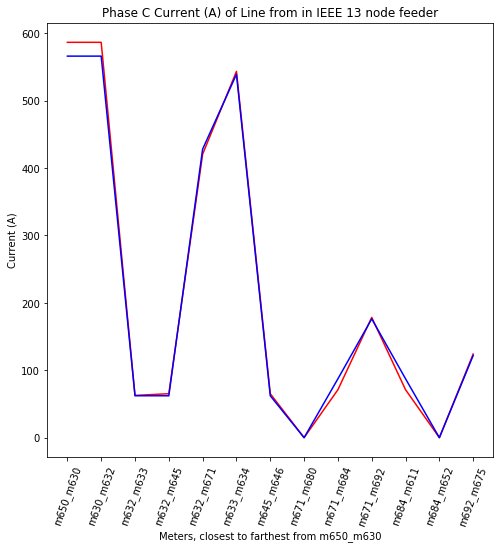

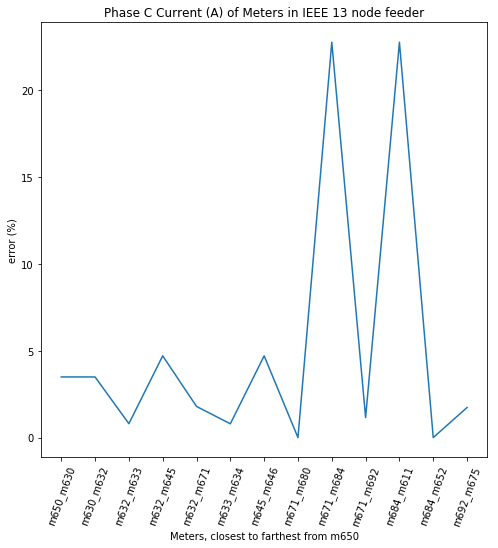

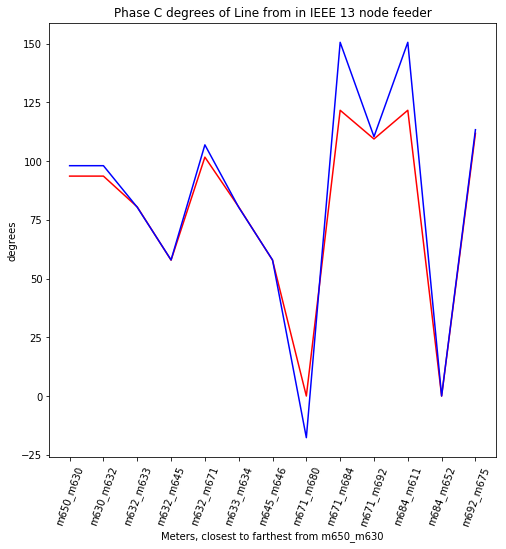

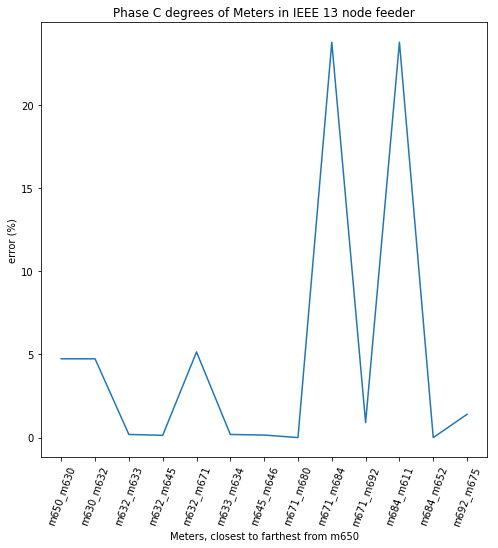

In [97]:
# I can either start resorting the meters by distance from m630 or I can get the currents for the lines. 
# If I work on getting current from the lines then I have to work on overground, underground lines, and then switches. 
# then I have to work on getting the IEEE data. 
    
input_to_amp_phase_2, input_to_deg_phase_2, input_from_amp_phase_2, input_from_deg_phase_2 = get_meter_currents('IEEE13_eric_3.xml')


err_mag_to_dict_A_2, err_ang_to_dict_A_2, err_mag_from_dict_A_2, err_ang_from_dict_A_2 = curr_plt("A", mname_lst,
                                                                                                input_to_amp_phase_2,  
                                                                                                input_to_deg_phase_2,  
                                                                                                input_from_amp_phase_2, 
                                                                                                input_from_deg_phase_2 )
err_mag_to_dict_B_2, err_ang_to_dict_B_2, err_mag_from_dict_B_2, err_ang_from_dict_B_2 = curr_plt("B", mname_lst,
                                                                                                 input_to_amp_phase_2,  
                                                                                                 input_to_deg_phase_2,  
                                                                                                 input_from_amp_phase_2,
                                                                                                 input_from_deg_phase_2 )
err_mag_to_dict_C_2, err_ang_to_dict_C_2, err_mag_from_dict_C_2, err_ang_from_dict_C_2 = curr_plt("C", mname_lst,
                                                                                                input_to_amp_phase_2,  
                                                                                                input_to_deg_phase_2,  
                                                                                                input_from_amp_phase_2,
                                                                                                input_from_deg_phase_2 )


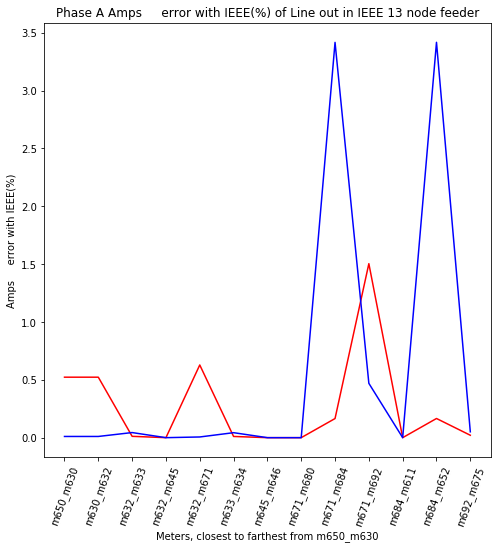

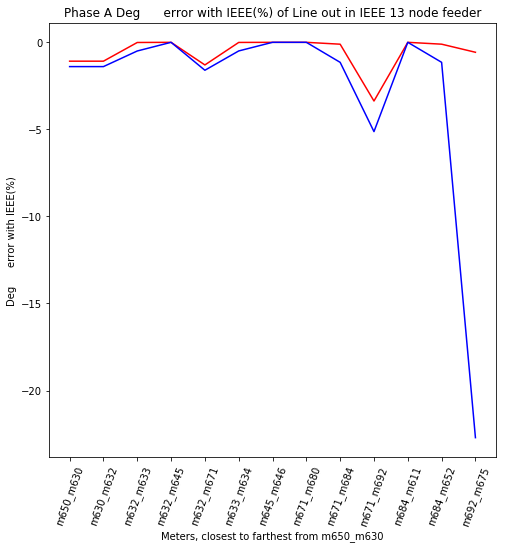

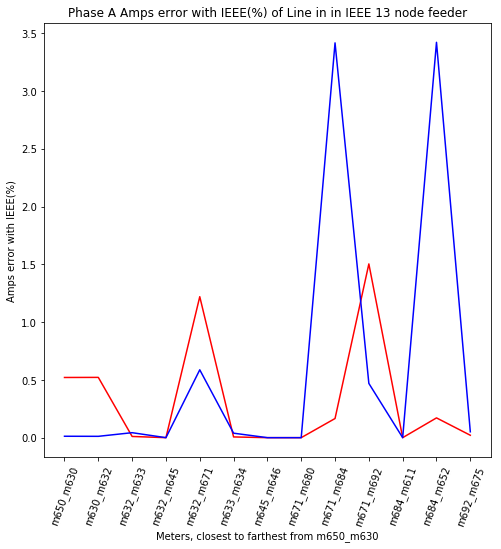

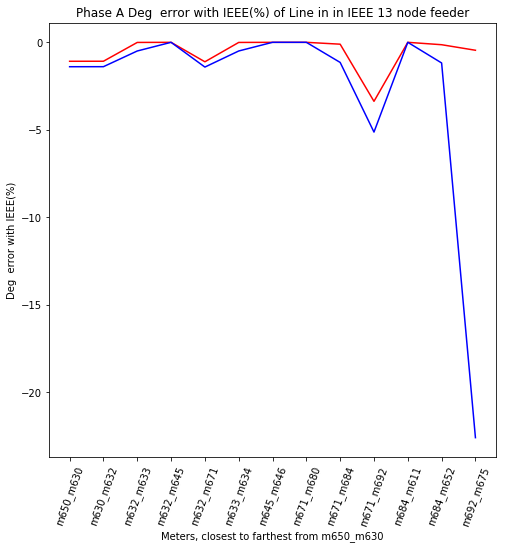

(['m650_m630',
  'm630_m632',
  'm632_m633',
  'm632_m645',
  'm632_m671',
  'm633_m634',
  'm645_m646',
  'm671_m680',
  'm671_m684',
  'm671_m692',
  'm684_m611',
  'm684_m652',
  'm692_m675'],
 [-1.0833735084756078,
  -1.081026284894512,
  -0.006596154364833906,
  0.0,
  -1.1122692994507757,
  -0.0067148559803471555,
  0.0,
  0.0,
  -0.10680143406063683,
  -3.37188229152149,
  0.0,
  -0.13698501100873303,
  -0.4537714363639711],
 [-1.3946791730974124,
  -1.3921472616837158,
  -0.49543357358137813,
  0.0,
  -1.4141376818411135,
  -0.49540816324296016,
  0.0,
  0.0,
  -1.148830454569229,
  -5.12829800456875,
  0.0,
  -1.1795998038558224,
  -22.59100580266146],
 [-28.734841879218216,
  -28.780149117240327,
  -7410.945714410268,
  0.0,
  -27.139864647832734,
  -7277.792832681836,
  0.0,
  0.0,
  -975.6695026369936,
  -52.09006605787282,
  0.0,
  -761.1159682139391,
  -4878.498863586724])

In [98]:
two_dict_plt(err_mag_to_dict_A, err_mag_to_dict_A_2, phase='A', y_label='Amps     error with IEEE(%)', direction = 'out', mname_lst=mname_lst, toggle_error=False)
two_dict_plt(err_ang_to_dict_A, err_ang_to_dict_A_2, phase='A', y_label='Deg      error with IEEE(%)', direction = 'out', mname_lst=mname_lst, toggle_error=False)
two_dict_plt(err_mag_from_dict_A, err_mag_from_dict_A_2, phase='A', y_label='Amps error with IEEE(%)', direction = 'in', mname_lst=mname_lst, toggle_error=False)
two_dict_plt(err_ang_from_dict_A, err_ang_from_dict_A_2, phase='A', y_label='Deg  error with IEEE(%)', direction = 'in', mname_lst=mname_lst, toggle_error=False)

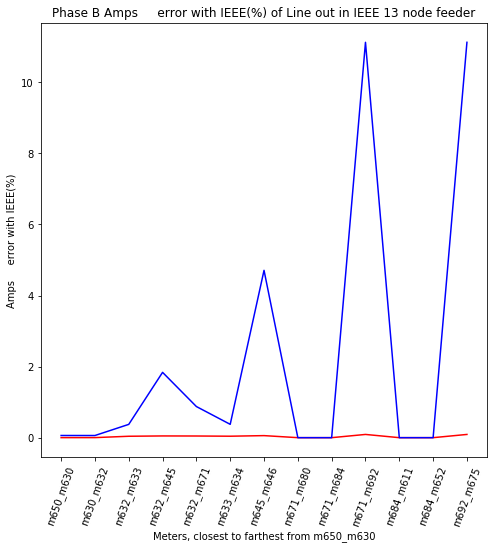

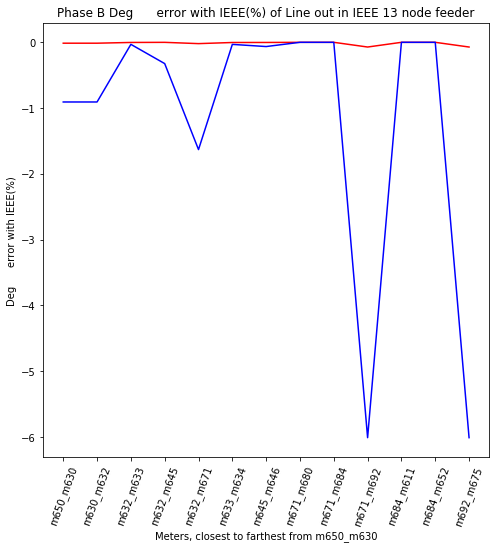

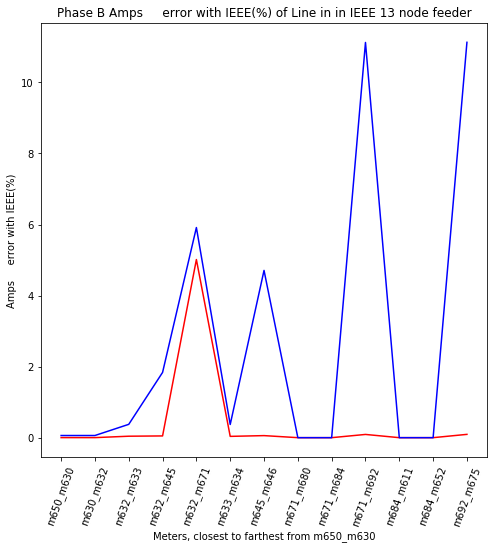

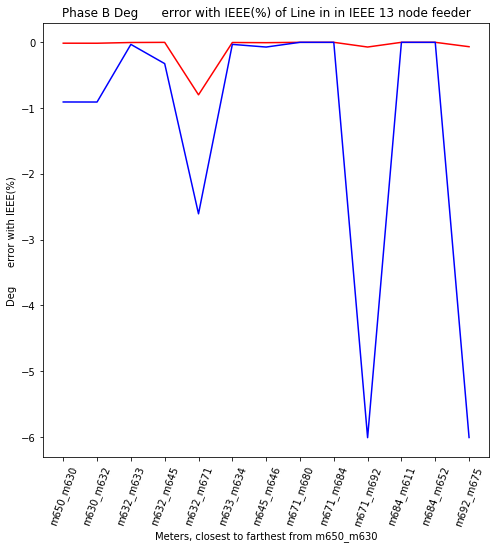

(['m650_m630',
  'm630_m632',
  'm632_m633',
  'm632_m645',
  'm632_m671',
  'm633_m634',
  'm645_m646',
  'm671_m680',
  'm671_m684',
  'm671_m692',
  'm684_m611',
  'm684_m652',
  'm692_m675'],
 [-0.013316505167791601,
  -0.013929746858407314,
  -0.0027259665613203836,
  -0.0006219165104607467,
  -0.7983714179427868,
  -0.002770290143125942,
  -0.0054742523401635984,
  0.0,
  0.0,
  -0.07153911006459598,
  0.0,
  0.0,
  -0.06668162512600008],
 [-0.9072198908039225,
  -0.9079070597915682,
  -0.03149800194082353,
  -0.32402238113690723,
  -2.6078975372326254,
  -0.03155145504394442,
  -0.07186707221163816,
  0.0,
  0.0,
  -6.011705415739701,
  0.0,
  0.0,
  -6.009392827746156],
 [-6712.747634403352,
  -6417.757063500403,
  -1055.4801290580306,
  -52000.62374720609,
  -226.65216697668825,
  -1038.9224021258062,
  -1212.8198655433264,
  0.0,
  0.0,
  -8303.383003103412,
  0.0,
  0.0,
  -8912.067142021426])

In [99]:
two_dict_plt(  err_mag_to_dict_B,   err_mag_to_dict_B_2,     phase='B', y_label='Amps     error with IEEE(%)', direction = 'out', mname_lst=mname_lst, toggle_error=False)
two_dict_plt(  err_ang_to_dict_B,   err_ang_to_dict_B_2,     phase='B', y_label='Deg      error with IEEE(%)', direction = 'out', mname_lst=mname_lst, toggle_error=False)
two_dict_plt(err_mag_from_dict_B, err_mag_from_dict_B_2,     phase='B', y_label='Amps     error with IEEE(%)', direction = 'in', mname_lst=mname_lst, toggle_error=False)
two_dict_plt(err_ang_from_dict_B, err_ang_from_dict_B_2,     phase='B', y_label='Deg      error with IEEE(%)', direction = 'in', mname_lst=mname_lst, toggle_error=False)

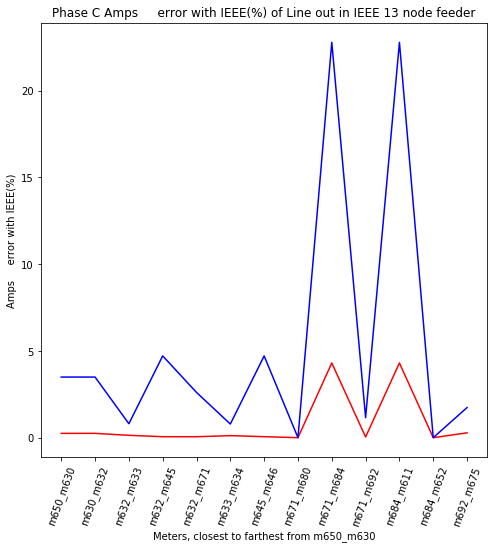

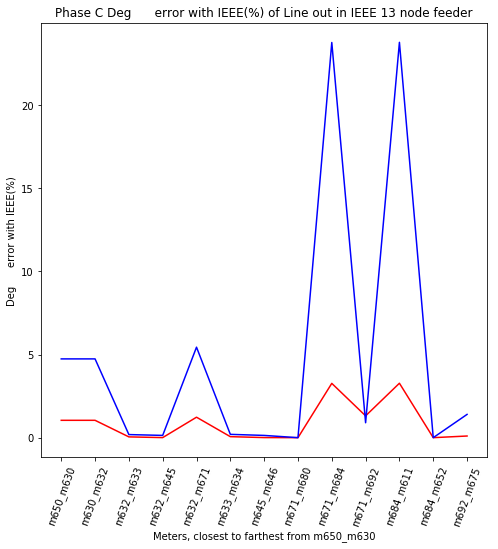

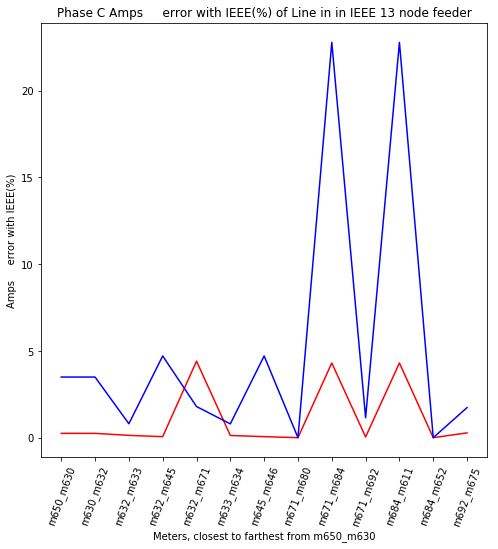

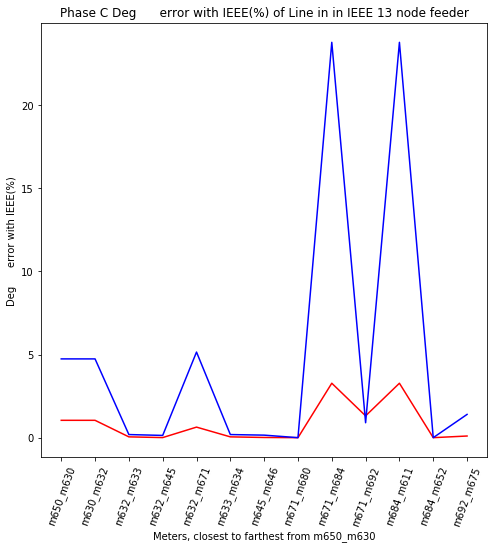

(['m650_m630',
  'm630_m632',
  'm632_m633',
  'm632_m645',
  'm632_m671',
  'm633_m634',
  'm645_m646',
  'm671_m680',
  'm671_m684',
  'm671_m692',
  'm684_m611',
  'm684_m652',
  'm692_m675'],
 [1.0436823901002255,
  1.0430963237359905,
  0.04815307565022217,
  0.004988369008331994,
  0.6346111180382357,
  0.04810719707508361,
  0.01156769545002556,
  0.0,
  3.2733862760822707,
  1.31142399971041,
  3.273017295001897,
  0.0,
  0.09927550429080469],
 [4.73710519137259,
  4.73646657459406,
  0.18668812794002165,
  0.13523610308259396,
  5.147873354107506,
  0.18664483452650546,
  0.1518630038536607,
  0.0,
  23.775731119600376,
  0.8971852054518374,
  23.775477979365732,
  0.0,
  1.398859671569396],
 [353.8837903471461,
  354.0775829436121,
  287.6972040085259,
  2611.0284515181456,
  711.1854973516779,
  287.97694705679555,
  1212.8198655448277,
  0.0,
  626.3344168490921,
  31.586946277485023,
  626.4085654442579,
  0.0,
  1309.068311022384])

In [100]:
two_dict_plt(  err_mag_to_dict_C,   err_mag_to_dict_C_2,     phase='C', y_label='Amps     error with IEEE(%)', direction = 'out', mname_lst=mname_lst, toggle_error=False)
two_dict_plt(  err_ang_to_dict_C,   err_ang_to_dict_C_2,     phase='C', y_label='Deg      error with IEEE(%)', direction = 'out', mname_lst=mname_lst, toggle_error=False)
two_dict_plt(err_mag_from_dict_C, err_mag_from_dict_C_2,     phase='C', y_label='Amps     error with IEEE(%)', direction = 'in', mname_lst=mname_lst, toggle_error=False)
two_dict_plt(err_ang_from_dict_C, err_ang_from_dict_C_2,     phase='C', y_label='Deg      error with IEEE(%)', direction = 'in', mname_lst=mname_lst, toggle_error=False)

In [101]:


# Currents
# Get in, out, and losses data
# M650 to RG60
# RG60 to m632
# M632 to m633
# M632 to m645
# M632 to m671
# M633 to XFXFM1
# XFXM1 to 634
# M645 to m646
# M671 to m680
# M671 to m684
# M671 to m692
# M684 to m611
# M684 to m652
# M692 to m675


In [102]:
# grab from other file, where we have all power measurements, then compare

In [88]:
# do the power on the lines

In [89]:
err_dict = {
            'A':{
                'to':{
                    'mag': err_mag_to_dict_A,
                    'ang': err_ang_to_dict_A
                },
                'from':{
                    'mag': err_mag_from_dict_A,
                    'ang': err_ang_from_dict_A
                }
            },
            'B':{
                'to':{
                    'mag': err_mag_to_dict_B,
                    'ang': err_ang_to_dict_B
                }, 
                'from':{ 
                    'mag': err_mag_from_dict_B,
                    'ang': err_ang_from_dict_B
                }
            },
            'C':{
                'to':{
                    'mag': err_mag_to_dict_C,
                    'ang': err_ang_to_dict_C
                },
                'from':{
                    'mag': err_mag_from_dict_C,
                    'ang': err_ang_from_dict_C
                }
            }
           }
err_dict_2 = {
"err_mag_to_dict_A"  :err_mag_to_dict_A,
"err_ang_to_dict_A"  :err_ang_to_dict_A,
"err_mag_from_dict_A":err_mag_from_dict_A,
"err_ang_from_dict_A":err_ang_from_dict_A,
"err_mag_to_dict_B"  :err_mag_to_dict_B,
"err_ang_to_dict_B"  :err_ang_to_dict_B,
"err_mag_from_dict_B":err_mag_from_dict_B,
"err_ang_from_dict_B":err_ang_from_dict_B,
"err_mag_to_dict_C"  :err_mag_to_dict_C,
"err_ang_to_dict_C"  :err_ang_to_dict_C,
"err_mag_from_dict_C":err_mag_from_dict_C,
"err_ang_from_dict_C":err_ang_from_dict_C
}
def find_abs_val_outliers(my_dict, val):
    ret_dict = {}
    ret_dict_2 = {}
    for a in my_dict.keys():
        a_dict = my_dict[a]
        ret_dict[a] = []
        for k in list(a_dict.keys()):
            if (float(abs(a_dict[k]))> float(val)):
                print("key: " + str(k) )
                print("value " + str(a_dict[k]))
                ret_dict[a].append(str(k))
                if k not in ret_dict_2:
                    ret_dict_2[k] = []
                ret_dict_2[k].append((a, 'error = ' + str(a_dict[k])))
    return ret_dict,ret_dict_2
                
ret_dict, ret_dict_2 = find_abs_val_outliers(err_dict_2, 0.5)

key: m632_m671
value 0.6282597608234315
key: m650_m630
value 0.5227040821749486
key: m630_m632
value 0.5227004947515553
key: m671_m692
value 1.5037685740093358
key: m632_m671
value -1.1122692994507757
key: m650_m630
value -1.0833735084756078
key: m630_m632
value -1.081026284894512
key: m671_m692
value -3.37188229152149
key: m671_m684
value 3.2733862760822707
key: m632_m671
value 0.6346111180382357
key: m650_m630
value 1.0436823901002255
key: m684_m611
value 3.273017295001897
key: m630_m632
value 1.0430963237359905
key: m671_m692
value 1.31142399971041
key: m671_m684
value 4.302899612821276
key: m632_m671
value 4.4098879791285235
key: m684_m611
value 4.302833505576876
key: m632_m671
value -0.7983714179427868
key: m671_m684
value 4.302933233078229
key: m684_m611
value 4.302899612821276
key: m671_m684
value 3.2653523142675467
key: m632_m671
value 1.2307357342466434
key: m650_m630
value 1.0436871142873603
key: m684_m611
value 3.2733862760822707
key: m630_m632
value 1.0436823901002255
key: 

In [90]:
ret_dict

{'err_ang_from_dict_A': ['m632_m671', 'm650_m630', 'm630_m632', 'm671_m692'],
 'err_ang_from_dict_B': ['m632_m671'],
 'err_ang_from_dict_C': ['m671_m684',
  'm632_m671',
  'm650_m630',
  'm684_m611',
  'm630_m632',
  'm671_m692'],
 'err_ang_to_dict_A': ['m632_m671',
  'm650_m630',
  'm692_m675',
  'm630_m632',
  'm671_m692'],
 'err_ang_to_dict_B': [],
 'err_ang_to_dict_C': ['m671_m684',
  'm632_m671',
  'm650_m630',
  'm684_m611',
  'm630_m632',
  'm671_m692'],
 'err_mag_from_dict_A': ['m632_m671', 'm650_m630', 'm630_m632', 'm671_m692'],
 'err_mag_from_dict_B': ['m632_m671'],
 'err_mag_from_dict_C': ['m671_m684', 'm632_m671', 'm684_m611'],
 'err_mag_to_dict_A': ['m632_m671', 'm650_m630', 'm630_m632', 'm671_m692'],
 'err_mag_to_dict_B': [],
 'err_mag_to_dict_C': ['m671_m684', 'm684_m611']}

In [91]:
ret_dict_2

{'m630_m632': [('err_mag_to_dict_A', 'error = 0.5227004947515553'),
  ('err_ang_from_dict_A', 'error = -1.081026284894512'),
  ('err_ang_from_dict_C', 'error = 1.0430963237359905'),
  ('err_ang_to_dict_C', 'error = 1.0436823901002255'),
  ('err_ang_to_dict_A', 'error = -1.0833735084756078'),
  ('err_mag_from_dict_A', 'error = 0.5217366068485816')],
 'm632_m671': [('err_mag_to_dict_A', 'error = 0.6282597608234315'),
  ('err_ang_from_dict_A', 'error = -1.1122692994507757'),
  ('err_ang_from_dict_C', 'error = 0.6346111180382357'),
  ('err_mag_from_dict_C', 'error = 4.4098879791285235'),
  ('err_ang_from_dict_B', 'error = -0.7983714179427868'),
  ('err_ang_to_dict_C', 'error = 1.2307357342466434'),
  ('err_ang_to_dict_A', 'error = -1.2992154193738288'),
  ('err_mag_from_dict_A', 'error = 1.2200926702760213'),
  ('err_mag_from_dict_B', 'error = 5.013910037164488')],
 'm650_m630': [('err_mag_to_dict_A', 'error = 0.5227040821749486'),
  ('err_ang_from_dict_A', 'error = -1.0833735084756078'),


In [92]:
ret_dict_2

{'m630_m632': [('err_mag_to_dict_A', 'error = 0.5227004947515553'),
  ('err_ang_from_dict_A', 'error = -1.081026284894512'),
  ('err_ang_from_dict_C', 'error = 1.0430963237359905'),
  ('err_ang_to_dict_C', 'error = 1.0436823901002255'),
  ('err_ang_to_dict_A', 'error = -1.0833735084756078'),
  ('err_mag_from_dict_A', 'error = 0.5217366068485816')],
 'm632_m671': [('err_mag_to_dict_A', 'error = 0.6282597608234315'),
  ('err_ang_from_dict_A', 'error = -1.1122692994507757'),
  ('err_ang_from_dict_C', 'error = 0.6346111180382357'),
  ('err_mag_from_dict_C', 'error = 4.4098879791285235'),
  ('err_ang_from_dict_B', 'error = -0.7983714179427868'),
  ('err_ang_to_dict_C', 'error = 1.2307357342466434'),
  ('err_ang_to_dict_A', 'error = -1.2992154193738288'),
  ('err_mag_from_dict_A', 'error = 1.2200926702760213'),
  ('err_mag_from_dict_B', 'error = 5.013910037164488')],
 'm650_m630': [('err_mag_to_dict_A', 'error = 0.5227040821749486'),
  ('err_ang_from_dict_A', 'error = -1.0833735084756078'),
